In [1]:
# This notebook analyses the ouput of 
# running complexity.py

# ! grep 'parsing_for_temporal_criticality:' complexity_results_all_cities_io_4_wide_margin_default_plus_minus_final_with_latest_metrics_run_1.txt | sed "s/parsing_for_temporal_criticality: //g" > Temporal_complexity_results_all_cities_io_4_standard_wide_margins_1.csv
# ! grep 'parsing_for_temporal_criticality:' complexity_results_all_cities_io_4_wide_margin_default_plus_minus_final_with_latest_metrics_run_2.txt | sed "s/parsing_for_temporal_criticality: //g" > Temporal_complexity_results_all_cities_io_4_standard_wide_margins_2.csv
# ! cat Temporal_complexity_results_all_cities_io_4_standard_wide_margins_1.csv Temporal_complexity_results_all_cities_io_4_standard_wide_margins_2.csv > Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv

# ! (echo "cityname i_o_length prediction_horizon grid_size time_stamp cx" && cat Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv) > filename1 && mv filename1 Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv
# headers: cityname i_o_length prediction_horizon grid_size time_stamp cx

grep: complexity_run_15jun/complexity_run_7.txt: No such file or directory
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 6.2 MB/s eta 0:00:00ta 0:00:01


generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4500/4500 [00:00<00:00, 6199.59it/s]


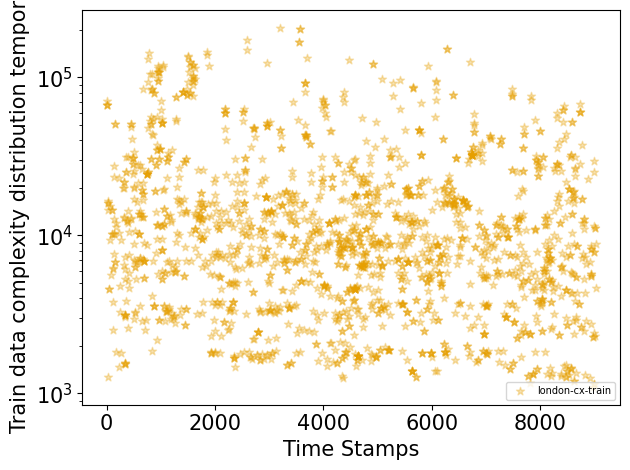

generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4500/4500 [00:00<00:00, 5919.54it/s]


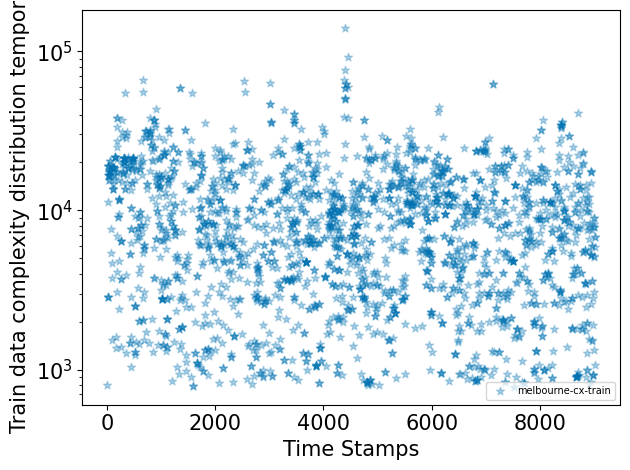

generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4500/4500 [00:00<00:00, 6637.25it/s]


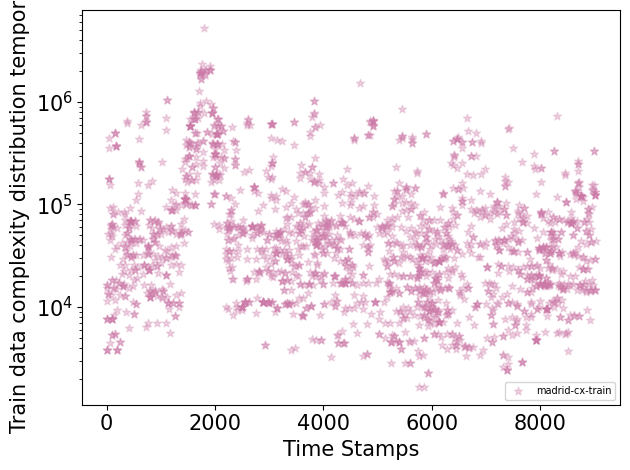

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


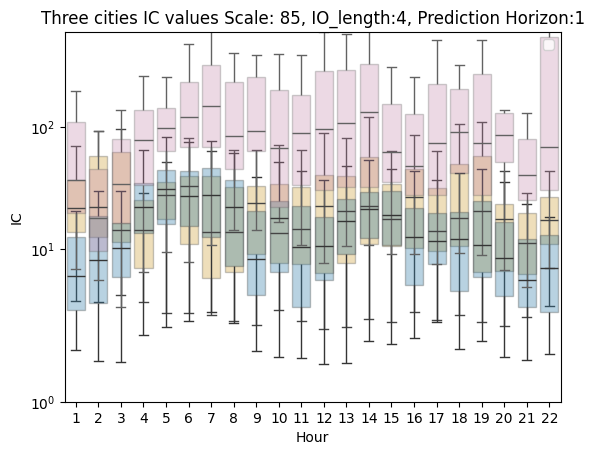

In [223]:
! grep 'parsing_for_temporal_criticality:' complexity_run_15jun/complexity_run_1.txt | sed "s/parsing_for_temporal_criticality: //g" > Temporal_complexity_results_jun10.csv
! grep 'parsing_for_temporal_criticality:' complexity_run_15jun/complexity_run_2.txt | sed "s/parsing_for_temporal_criticality: //g" >> Temporal_complexity_results_jun10.csv
! grep 'parsing_for_temporal_criticality:' complexity_run_15jun/complexity_run_3.txt | sed "s/parsing_for_temporal_criticality: //g" >> Temporal_complexity_results_jun10.csv
! grep 'parsing_for_temporal_criticality:' complexity_run_15jun/complexity_run_4.txt | sed "s/parsing_for_temporal_criticality: //g" >> Temporal_complexity_results_jun10.csv
! grep 'parsing_for_temporal_criticality:' complexity_run_15jun/complexity_run_5.txt | sed "s/parsing_for_temporal_criticality: //g" >> Temporal_complexity_results_jun10.csv
! grep 'parsing_for_temporal_criticality:' complexity_run_15jun/complexity_run_6.txt | sed "s/parsing_for_temporal_criticality: //g" >> Temporal_complexity_results_jun10.csv
! grep 'parsing_for_temporal_criticality:' complexity_run_15jun/complexity_run_7.txt | sed "s/parsing_for_temporal_criticality: //g" >> Temporal_complexity_results_jun10.csv
! grep 'parsing_for_temporal_criticality:' complexity_run_15jun/complexity_run_8.txt | sed "s/parsing_for_temporal_criticality: //g" >> Temporal_complexity_results_jun10.csv
! grep 'parsing_for_temporal_criticality:' complexity_run_15jun/complexity_run_9.txt | sed "s/parsing_for_temporal_criticality: //g" >> Temporal_complexity_results_jun10.csv
! grep 'parsing_for_temporal_criticality:' complexity_run_15jun/complexity_run_10.txt | sed "s/parsing_for_temporal_criticality: //g" >> Temporal_complexity_results_jun10.csv
! (echo "cityname i_o_length prediction_horizon grid_size time_stamp cx" && cat Temporal_complexity_results_jun10.csv) > filename1 && mv filename1 Temporal_complexity_results_jun10.csv


city_color = {"london" : "#E69F00", 
             "melbourne": "#0072B2",
             "madrid": "#CC79A7"}

import sys
import os

sys.path.append("../")
# ! pip install -r ../../../requirements.txt
import config

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
import pandas as pd
from tqdm import tqdm


import pandas as pd


# scales

violin_plot_dict_cx = {}

for city in config.city_list:

    cityname = city.lower()

    for CSR_type in [
    'cx',
        ]:

        cityname = city.lower()

        city_label_printed = []
        
        # df = pd.read_csv("Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv", sep=" ")        
        df = pd.read_csv("Temporal_complexity_results_jun10.csv", sep=" ")        

        x = []
        y = []
        for scale in [85]: #config.scales_def:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname)
                                      ]
                    
                    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap

                    # if printing only some points star even if multiple present, uncomment below:
                    # range_ = list(range(2000))
                    
                    violin_plot = []
                    for i in tqdm(range_, desc="generating-plot"):
                        # if cityname in city_label_printed:
                        #     plt.scatter(filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type], marker='*',color=city_color[cityname], alpha=0.3)
                        # else:
                        #     plt.scatter(filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type], marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])
                        #     city_label_printed.append(cityname)
                        x.append(filtered_rows.iloc[i]["time_stamp"])
                        y.append(filtered_rows.iloc[i][CSR_type])
                        
                        
                        
                        # Scale preferntially for the same axis
                        
                        # if cityname == "london":
                        #     y[-1] = y[-1] * 10000
                        # elif cityname == "madrid":
                        #     y[-1] = y[-1] * 1000
                        # elif cityname == "melbourne":
                        #     y[-1] = y[-1] * 10                           

                            

                        violin_plot.append([filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type]])
                    violin_plot_dict_cx[cityname, i_o_length, pred_horiz, scale] = violin_plot
        plt.scatter(x,  y, marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])

    plt.xlabel("Time Stamps", fontsize=15)
    plt.ylabel("Train data complexity distribution temporal", fontsize=15)
    plt.yscale('log')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
    plt.tight_layout()
    plt.savefig("Temporal_dist_cx" + cityname + ".png")
    plt.show()



import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


plt.figure()
cityname_labelled = []
for key in violin_plot_dict_cx:
    cityname, i_o_length, pred_horiz, scale = key
    if scale != 85:
        continue

    df_cx = pd.DataFrame(violin_plot_dict_cx[key], columns=['ToD', 'Cx'])

    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)

    df_cx["Day"] = df_cx["ToD"] // periodicity
    df_cx["Hour"] = (df_cx["ToD"] % periodicity) // 4 + 1
    
    df_cx = df_cx[df_cx["Cx"] > 0]    
    df_cx["IC"] = df_cx["Cx"]/500 # N=500 for these runs
    
        
    # if cityname not in cityname_labelled:
    #     ax = sns.boxplot(data=df_val_error, x="Hour", y="val_mae", color=city_color[cityname], boxprops=dict(alpha=.3, label=cityname), showfliers=False)
    #     cityname_labelled.append(cityname)
    # else:
    #     print ("Not reached")
    ax = sns.boxplot(data=df_cx, x="Hour", y="IC", color=city_color[cityname], boxprops=dict(alpha=.3), showfliers=False)
    
plt.title(r"Three cities IC values Scale: 85, IO_length:4, Prediction Horizon:1")
plt.ylim(1, 600)
plt.yscale('symlog')
plt.legend()

plt.savefig(str(key) + "_hourly_plots_cx_normal_margin_7_day_2_hour.png", dpi=300)
plt.show()



In [107]:
df["Hour"]

0        4
1        8
3       16
5        2
6        9
        ..
6990     7
6992    14
6997     2
6998    20
6999     9
Name: Hour, Length: 3100, dtype: int64

In [19]:
df [(df["ToD"] % 4 == 0)] 

ToD      Cx  Day  Hour
0      692  13.860    7    21
3     4348   7.682   49    22
7      136  20.426    1    13
12    3924  22.552   45     3
21    4740  12.546   54    11
...    ...     ...  ...   ...
6954  5528  36.764   63    12
6958  5204   3.770   59    18
6962  3028  28.580   34    18
6978  5320  27.632   61     4
6979  4288  24.998   49     7

[676 rows x 4 columns]

generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:01<00:00, 2984.03it/s]


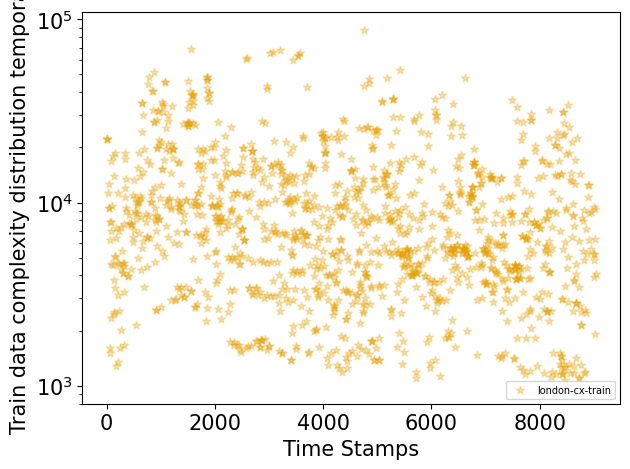

generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 3128.20it/s]


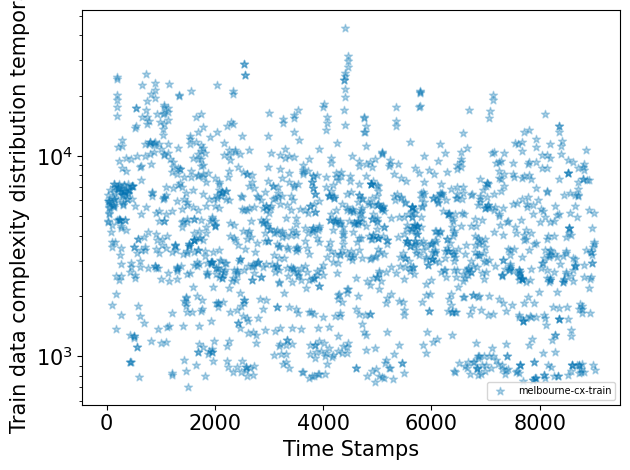

generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 3344.67it/s]


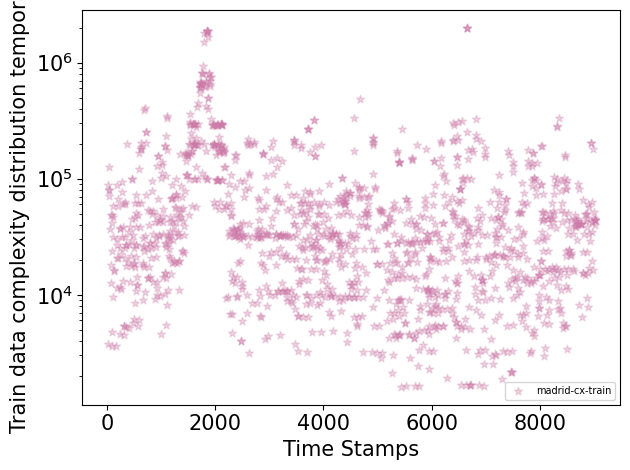

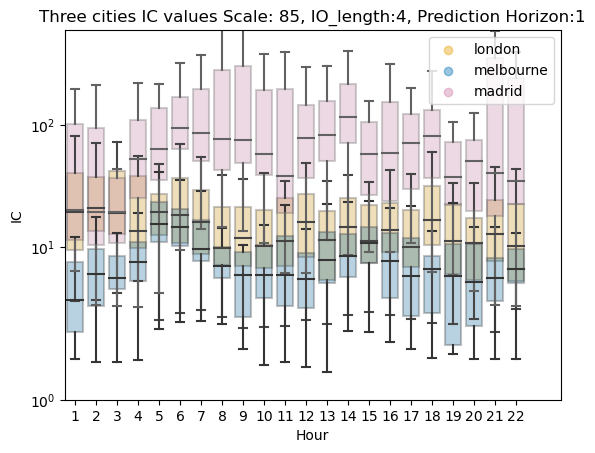

In [21]:
# THIN margin comparison

! grep 'parsing_for_temporal_criticality:' Spatial_results_validation_errors/complexity_thin_margin_85_Scale_allcities.txt | sed "s/parsing_for_temporal_criticality: //g" > parsed_Results.csv
! (echo "cityname i_o_length prediction_horizon grid_size time_stamp cx" && cat parsed_Results.csv) > filename1 && mv filename1 Temporal_complexity_results_thin.csv

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
import pandas as pd
from tqdm import tqdm


import pandas as pd


# scales

violin_plot_dict_cx = {}

for city in config.city_list:

    cityname = city.lower()

    for CSR_type in [
    'cx',
        ]:

        cityname = city.lower()

        city_label_printed = []
        
        # df = pd.read_csv("Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv", sep=" ")        
        df = pd.read_csv("Temporal_complexity_results_thin.csv", sep=" ")        

        x = []
        y = []
        for scale in [85]: #config.scales_def:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname)
                                      ]
                    
                    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap

                    # if printing only some points star even if multiple present, uncomment below:
                    # range_ = list(range(2000))
                    
                    violin_plot = []
                    for i in tqdm(range_, desc="generating-plot"):
                        # if cityname in city_label_printed:
                        #     plt.scatter(filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type], marker='*',color=city_color[cityname], alpha=0.3)
                        # else:
                        #     plt.scatter(filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type], marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])
                        #     city_label_printed.append(cityname)
                        x.append(filtered_rows.iloc[i]["time_stamp"])
                        y.append(filtered_rows.iloc[i][CSR_type])
                        
                        
                        
                        # Scale preferntially for the same axis
                        
                        # if cityname == "london":
                        #     y[-1] = y[-1] * 10000
                        # elif cityname == "madrid":
                        #     y[-1] = y[-1] * 1000
                        # elif cityname == "melbourne":
                        #     y[-1] = y[-1] * 10                           

                            

                        violin_plot.append([filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type]])
                    violin_plot_dict_cx[cityname, i_o_length, pred_horiz, scale] = violin_plot
        plt.scatter(x,  y, marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])

    plt.xlabel("Time Stamps", fontsize=15)
    plt.ylabel("Train data complexity distribution temporal", fontsize=15)
    plt.yscale('log')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
    plt.tight_layout()
    plt.savefig("Temporal_dist_cx" + cityname + ".png")
    plt.show()



import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


plt.figure()
cityname_labelled = []
for key in violin_plot_dict_cx:
    cityname, i_o_length, pred_horiz, scale = key
    if scale != 85:
        continue

    df_cx = pd.DataFrame(violin_plot_dict_cx[key], columns=['ToD', 'Cx'])

    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)

    df_cx["Day"] = df_cx["ToD"] // periodicity
    df_cx["Hour"] = (df_cx["ToD"] % periodicity) // 4 + 1
    
    df_cx = df_cx[df_cx["Cx"] > 0]    
    df_cx["IC"] = df_cx["Cx"]/500 # N=500 for these runs
    
        
    # if cityname not in cityname_labelled:
    #     ax = sns.boxplot(data=df_val_error, x="Hour", y="val_mae", color=city_color[cityname], boxprops=dict(alpha=.3, label=cityname), showfliers=False)
    #     cityname_labelled.append(cityname)
    # else:
    #     print ("Not reached")
    ax = sns.boxplot(data=df_cx, x="Hour", y="IC", color=city_color[cityname], boxprops=dict(alpha=0.3), showfliers=False)
    plt.scatter(22, 0.5, color=city_color[cityname], label=cityname, alpha=0.4)
    
plt.title(r"Three cities IC values Scale: 85, IO_length:4, Prediction Horizon:1")
plt.ylim(1, 600)
plt.yscale('symlog')
plt.legend()

plt.savefig(str(key) + "_hourly_plots_cx_thin_margin.png", dpi=300)
plt.show()



generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:01<00:00, 2249.89it/s]


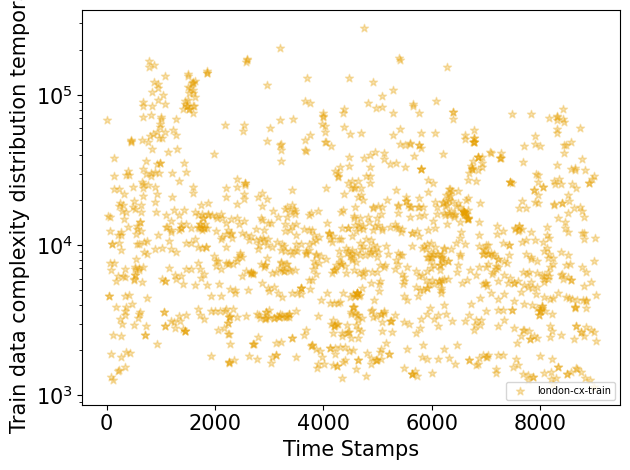

generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:01<00:00, 2333.27it/s]


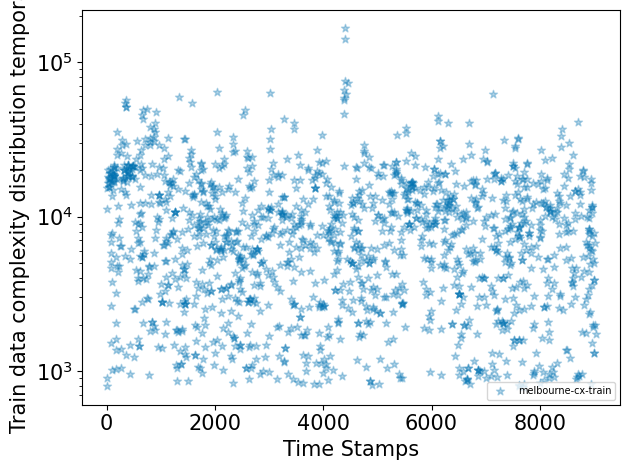

generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:01<00:00, 2476.15it/s]


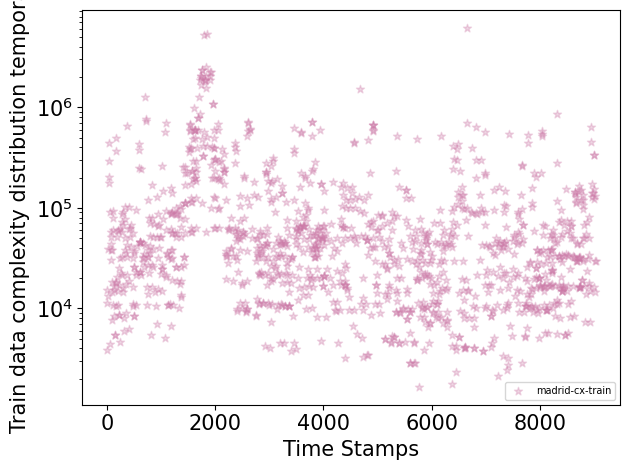

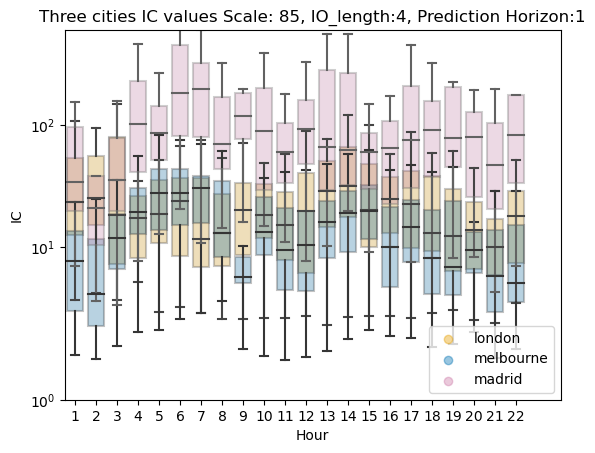

In [55]:
# THIN margin comparison

! grep 'parsing_for_temporal_criticality:' Spatial_results_validation_errors/complexity_normal_margi_85_scale_temporal_PM_run_3000_samples_train_and_validation_both/complexity_normal_margi_85_scale_temporal_PM_run_3000_samples_train_data.txt | sed "s/parsing_for_temporal_criticality: //g" > parsed_Results.csv
! (echo "cityname i_o_length prediction_horizon grid_size time_stamp cx" && cat parsed_Results.csv) > filename1 && mv filename1 Temporal_complexity_results_train_data_thick_margin.csv

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
import pandas as pd
from tqdm import tqdm


import pandas as pd


# scales

violin_plot_dict_cx = {}

for city in config.city_list:

    cityname = city.lower()

    for CSR_type in [
    'cx',
        ]:

        cityname = city.lower()

        city_label_printed = []
        
        # df = pd.read_csv("Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv", sep=" ")        
        df = pd.read_csv("Temporal_complexity_results_train_data_thick_margin.csv", sep=" ")        

        x = []
        y = []
        for scale in [85]: #config.scales_def:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname)
                                      ]
                    
                    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap

                    # if printing only some points star even if multiple present, uncomment below:
                    # range_ = list(range(2000))
                    
                    violin_plot = []
                    for i in tqdm(range_, desc="generating-plot"):
                        # if cityname in city_label_printed:
                        #     plt.scatter(filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type], marker='*',color=city_color[cityname], alpha=0.3)
                        # else:
                        #     plt.scatter(filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type], marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])
                        #     city_label_printed.append(cityname)
                        x.append(filtered_rows.iloc[i]["time_stamp"])
                        y.append(filtered_rows.iloc[i][CSR_type])
                        
                        
                        
                        # Scale preferntially for the same axis
                        
                        # if cityname == "london":
                        #     y[-1] = y[-1] * 10000
                        # elif cityname == "madrid":
                        #     y[-1] = y[-1] * 1000
                        # elif cityname == "melbourne":
                        #     y[-1] = y[-1] * 10                           

                            

                        violin_plot.append([filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type]])
                    violin_plot_dict_cx[cityname, i_o_length, pred_horiz, scale] = violin_plot
        plt.scatter(x,  y, marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])

    plt.xlabel("Time Stamps", fontsize=15)
    plt.ylabel("Train data complexity distribution temporal", fontsize=15)
    plt.yscale('log')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
    plt.tight_layout()
    plt.savefig("Temporal_dist_cx" + cityname + ".png")
    plt.show()



import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


plt.figure()
cityname_labelled = []
for key in violin_plot_dict_cx:
    cityname, i_o_length, pred_horiz, scale = key
    if scale != 85:
        continue

    df_cx = pd.DataFrame(violin_plot_dict_cx[key], columns=['ToD', 'Cx'])

    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)

    df_cx["Day"] = df_cx["ToD"] // periodicity
    df_cx["Hour"] = (df_cx["ToD"] % periodicity) // 4 + 1
    
    df_cx = df_cx[df_cx["Cx"] > 0]    
    df_cx["IC"] = df_cx["Cx"]/500 # N=500 for these runs
    
        
    # if cityname not in cityname_labelled:
    #     ax = sns.boxplot(data=df_val_error, x="Hour", y="val_mae", color=city_color[cityname], boxprops=dict(alpha=.3, label=cityname), showfliers=False)
    #     cityname_labelled.append(cityname)
    # else:
    #     print ("Not reached")
    ax = sns.boxplot(data=df_cx, x="Hour", y="IC", color=city_color[cityname], boxprops=dict(alpha=0.3), showfliers=False)
    plt.scatter(22, 0.5, color=city_color[cityname], label=cityname, alpha=0.4)
    
plt.title(r"Three cities IC values Scale: 85, IO_length:4, Prediction Horizon:1")
plt.ylim(1, 600)
plt.yscale('symlog')
plt.legend()

plt.savefig(str(key) + "_hourly_plots_cx_thin_margin.png", dpi=300)
plt.show()



generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 3080.15it/s]


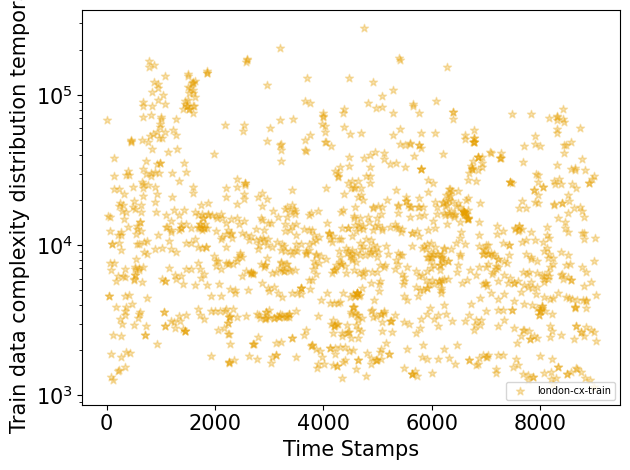

generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:01<00:00, 2856.87it/s]


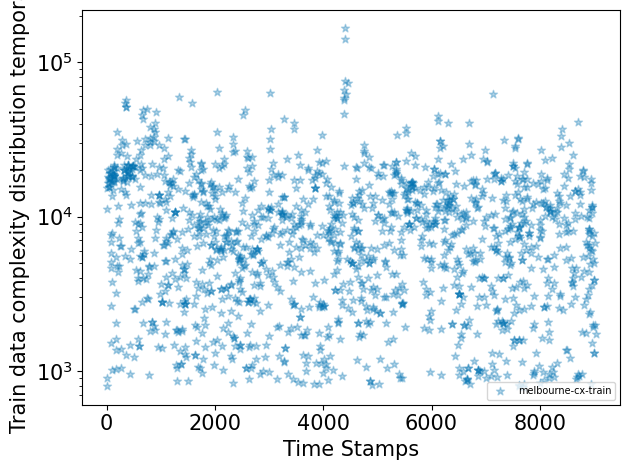

generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 3136.86it/s]


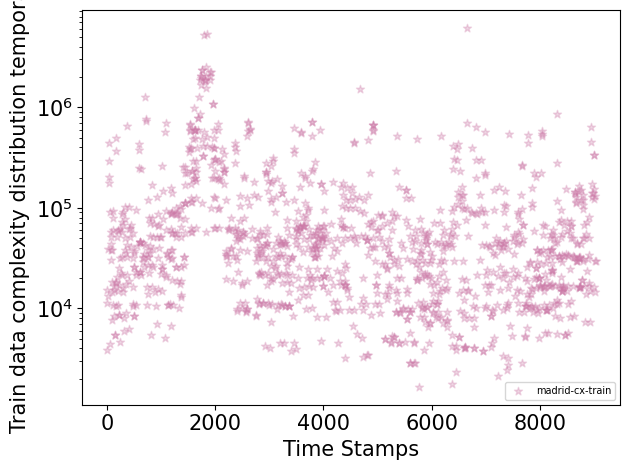

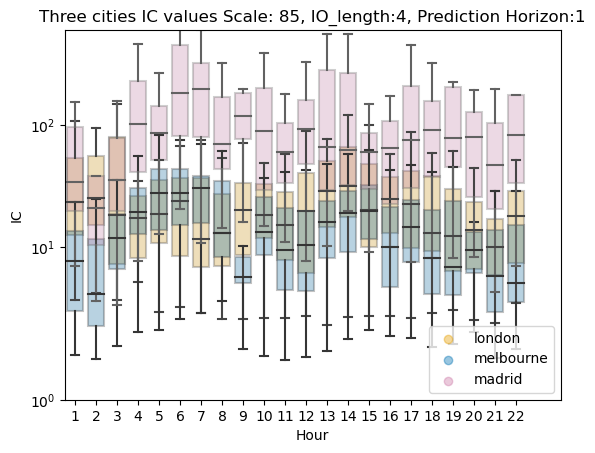

In [70]:
# THIN margin comparison

! grep 'parsing_for_temporal_criticality:' Spatial_results_validation_errors/complexity_normal_margi_85_scale_temporal_PM_run_3000_samples_train_and_validation_both/complexity_normal_margi_85_scale_temporal_PM_run_3000_samples_train_data.txt | sed "s/parsing_for_temporal_criticality: //g" > parsed_Results.csv
! (echo "cityname i_o_length prediction_horizon grid_size time_stamp cx" && cat parsed_Results.csv) > filename1 && mv filename1 Temporal_complexity_results_val_data_thick_margin.csv

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
import pandas as pd
from tqdm import tqdm


import pandas as pd


# scales

violin_plot_dict_cx = {}

for city in config.city_list:

    cityname = city.lower()

    for CSR_type in [
    'cx',
        ]:

        cityname = city.lower()

        city_label_printed = []
        
        # df = pd.read_csv("Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv", sep=" ")        
        df = pd.read_csv("Temporal_complexity_results_val_data_thick_margin.csv", sep=" ")        

        x = []
        y = []
        for scale in [85]: #config.scales_def:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname)
                                      ]
                    
                    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap

                    # if printing only some points star even if multiple present, uncomment below:
                    # range_ = list(range(2000))
                    
                    violin_plot = []
                    for i in tqdm(range_, desc="generating-plot"):
                        # if cityname in city_label_printed:
                        #     plt.scatter(filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type], marker='*',color=city_color[cityname], alpha=0.3)
                        # else:
                        #     plt.scatter(filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type], marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])
                        #     city_label_printed.append(cityname)
                        x.append(filtered_rows.iloc[i]["time_stamp"])
                        y.append(filtered_rows.iloc[i][CSR_type])
                        
                        
                        
                        # Scale preferntially for the same axis
                        
                        # if cityname == "london":
                        #     y[-1] = y[-1] * 10000
                        # elif cityname == "madrid":
                        #     y[-1] = y[-1] * 1000
                        # elif cityname == "melbourne":
                        #     y[-1] = y[-1] * 10                           

                            

                        violin_plot.append([filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type]])
                    violin_plot_dict_cx[cityname, i_o_length, pred_horiz, scale] = violin_plot
        plt.scatter(x,  y, marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])

    plt.xlabel("Time Stamps", fontsize=15)
    plt.ylabel("Train data complexity distribution temporal", fontsize=15)
    plt.yscale('log')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
    plt.tight_layout()
    plt.savefig("Temporal_dist_cx" + cityname + ".png")
    plt.show()



import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


plt.figure()
cityname_labelled = []
for key in violin_plot_dict_cx:
    cityname, i_o_length, pred_horiz, scale = key
    if scale != 85:
        continue

    df_cx = pd.DataFrame(violin_plot_dict_cx[key], columns=['ToD', 'Cx'])

    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)

    df_cx["Day"] = df_cx["ToD"] // periodicity
    df_cx["Hour"] = (df_cx["ToD"] % periodicity) // 4 + 1
    
    df_cx = df_cx[df_cx["Cx"] > 0]    
    df_cx["IC"] = df_cx["Cx"]/500 # N=500 for these runs
    
        
    # if cityname not in cityname_labelled:
    #     ax = sns.boxplot(data=df_val_error, x="Hour", y="val_mae", color=city_color[cityname], boxprops=dict(alpha=.3, label=cityname), showfliers=False)
    #     cityname_labelled.append(cityname)
    # else:
    #     print ("Not reached")
    ax = sns.boxplot(data=df_cx, x="Hour", y="IC", color=city_color[cityname], boxprops=dict(alpha=0.3), showfliers=False)
    plt.scatter(22, 0.5, color=city_color[cityname], label=cityname, alpha=0.4)
    
plt.title(r"Three cities IC values Scale: 85, IO_length:4, Prediction Horizon:1")
plt.ylim(1, 600)
plt.yscale('symlog')
plt.legend()

plt.savefig(str(key) + "_hourly_plots_cx_thin_margin.png", dpi=300)
plt.show()



generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 3433.63it/s]


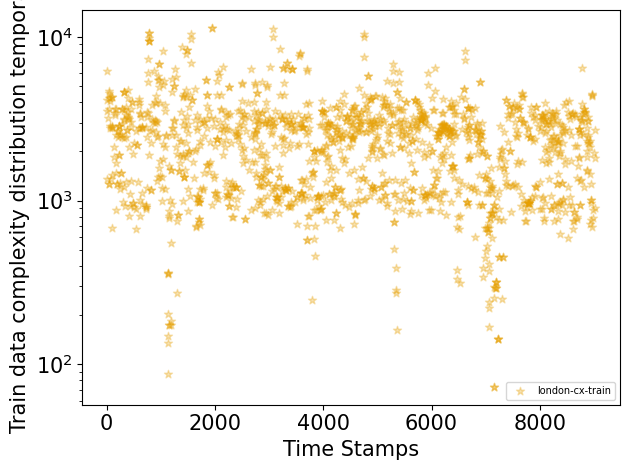

generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 3349.63it/s]


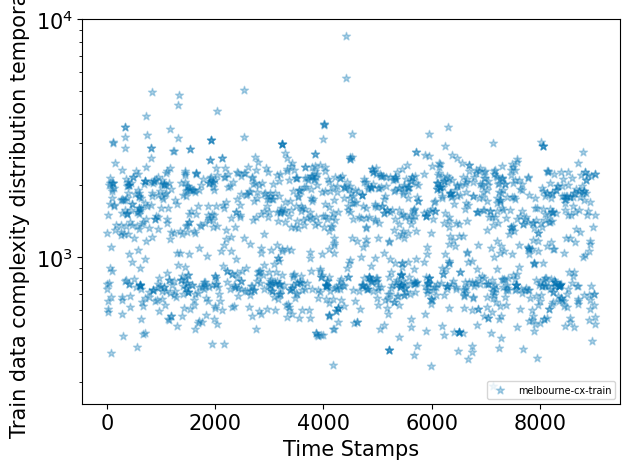

generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 3306.39it/s]


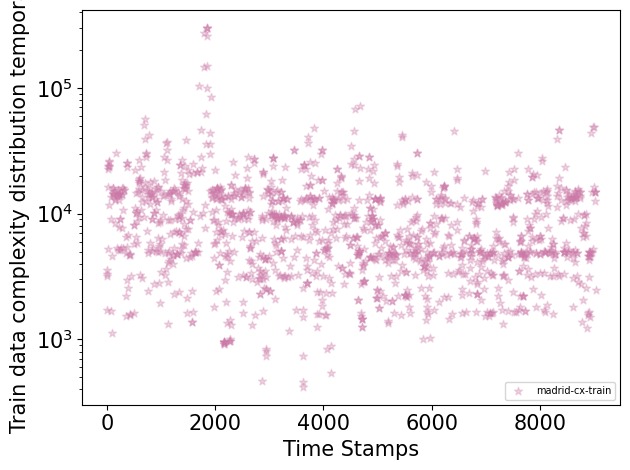

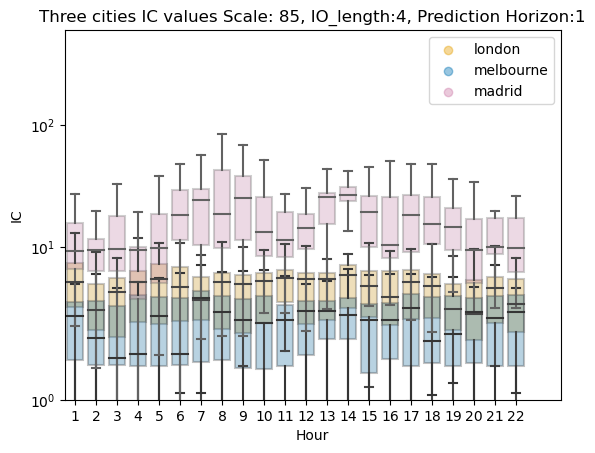

In [84]:
# THIN margin comparison

! grep 'parsing_for_temporal_criticality:' Spatial_results_validation_errors/complexity_normal_margi_85_scale_temporal_PM_run_3000_samples_train_and_validation_both/complexity_thin_margi_85_scale_temporal_PM_run_3000_samples_train_data.txt | sed "s/parsing_for_temporal_criticality: //g" > parsed_Results.csv
! (echo "cityname i_o_length prediction_horizon grid_size time_stamp cx" && cat parsed_Results.csv) > filename1 && mv filename1 Temporal_complexity_results_train_data_thin_margin.csv

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
import pandas as pd
from tqdm import tqdm


import pandas as pd


# scales

violin_plot_dict_cx = {}

for city in config.city_list:

    cityname = city.lower()

    for CSR_type in [
    'cx',
        ]:

        cityname = city.lower()

        city_label_printed = []
        
        # df = pd.read_csv("Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv", sep=" ")        
        df = pd.read_csv("Temporal_complexity_results_train_data_thin_margin.csv", sep=" ")        

        x = []
        y = []
        for scale in [85]: #config.scales_def:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname)
                                      ]
                    
                    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap

                    # if printing only some points star even if multiple present, uncomment below:
                    # range_ = list(range(2000))
                    
                    violin_plot = []
                    for i in tqdm(range_, desc="generating-plot"):
                        # if cityname in city_label_printed:
                        #     plt.scatter(filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type], marker='*',color=city_color[cityname], alpha=0.3)
                        # else:
                        #     plt.scatter(filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type], marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])
                        #     city_label_printed.append(cityname)
                        x.append(filtered_rows.iloc[i]["time_stamp"])
                        y.append(filtered_rows.iloc[i][CSR_type])
                        
                        
                        
                        # Scale preferntially for the same axis
                        
                        # if cityname == "london":
                        #     y[-1] = y[-1] * 10000
                        # elif cityname == "madrid":
                        #     y[-1] = y[-1] * 1000
                        # elif cityname == "melbourne":
                        #     y[-1] = y[-1] * 10                           

                            

                        violin_plot.append([filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type]])
                    violin_plot_dict_cx[cityname, i_o_length, pred_horiz, scale] = violin_plot
        plt.scatter(x,  y, marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])

    plt.xlabel("Time Stamps", fontsize=15)
    plt.ylabel("Train data complexity distribution temporal", fontsize=15)
    plt.yscale('log')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
    plt.tight_layout()
    plt.savefig("Temporal_dist_cx" + cityname + ".png")
    plt.show()



import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


plt.figure()
cityname_labelled = []
for key in violin_plot_dict_cx:
    cityname, i_o_length, pred_horiz, scale = key
    if scale != 85:
        continue

    df_cx = pd.DataFrame(violin_plot_dict_cx[key], columns=['ToD', 'Cx'])

    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)

    df_cx["Day"] = df_cx["ToD"] // periodicity
    df_cx["Hour"] = (df_cx["ToD"] % periodicity) // 4 + 1
    
    df_cx = df_cx[df_cx["Cx"] > 0]    
    df_cx["IC"] = df_cx["Cx"]/500 # N=500 for these runs
    
        
    # if cityname not in cityname_labelled:
    #     ax = sns.boxplot(data=df_val_error, x="Hour", y="val_mae", color=city_color[cityname], boxprops=dict(alpha=.3, label=cityname), showfliers=False)
    #     cityname_labelled.append(cityname)
    # else:
    #     print ("Not reached")
    ax = sns.boxplot(data=df_cx, x="Hour", y="IC", color=city_color[cityname], boxprops=dict(alpha=0.3), showfliers=False)
    plt.scatter(22, 0.5, color=city_color[cityname], label=cityname, alpha=0.4)
    
plt.title(r"Three cities IC values Scale: 85, IO_length:4, Prediction Horizon:1")
plt.ylim(1, 600)
plt.yscale('symlog')
plt.legend()

plt.savefig(str(key) + "_hourly_plots_cx_thin_margin.png", dpi=300)
plt.show()



generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 3266.42it/s]


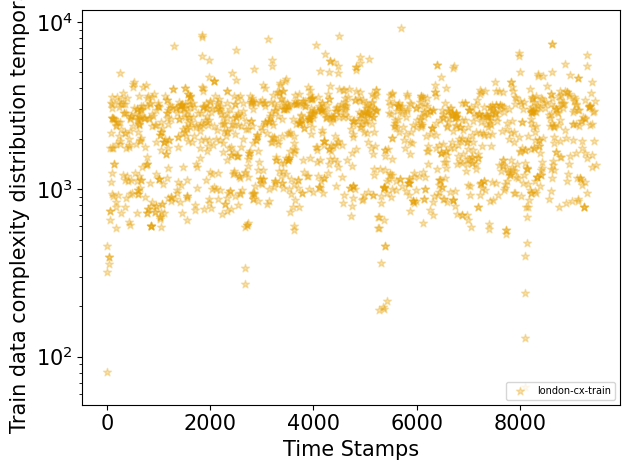

generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 3307.44it/s]


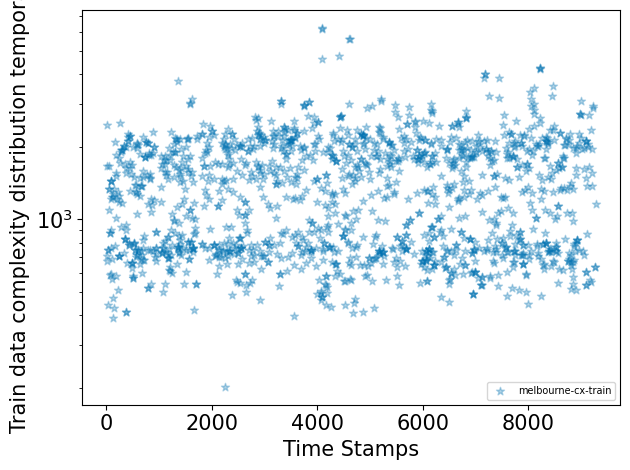

generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 3176.06it/s]


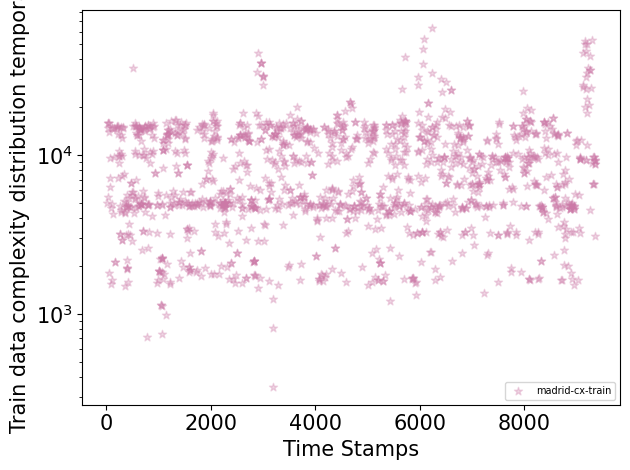

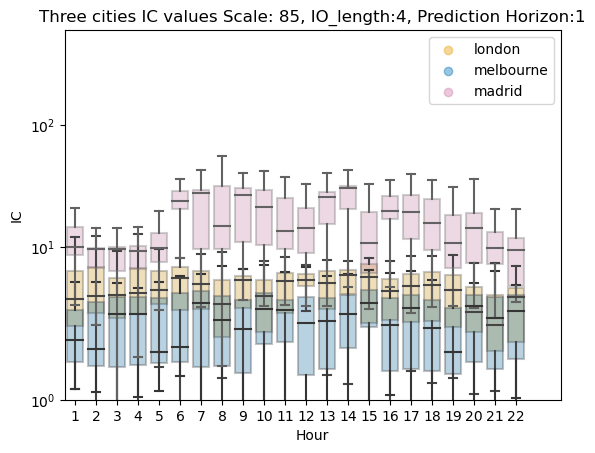

In [85]:
# THIN margin comparison

! grep 'parsing_for_temporal_criticality:' Spatial_results_validation_errors/complexity_normal_margi_85_scale_temporal_PM_run_3000_samples_train_and_validation_both/complexity_thin_margi_85_scale_temporal_PM_run_3000_samples_val_data.txt | sed "s/parsing_for_temporal_criticality: //g" > parsed_Results.csv
! (echo "cityname i_o_length prediction_horizon grid_size time_stamp cx" && cat parsed_Results.csv) > filename1 && mv filename1 Temporal_complexity_results_val_data_thin_margin.csv

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
import pandas as pd
from tqdm import tqdm


import pandas as pd


# scales

violin_plot_dict_cx = {}

for city in config.city_list:

    cityname = city.lower()

    for CSR_type in [
    'cx',
        ]:

        cityname = city.lower()

        city_label_printed = []
        
        # df = pd.read_csv("Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv", sep=" ")        
        df = pd.read_csv("Temporal_complexity_results_val_data_thin_margin.csv", sep=" ")        

        x = []
        y = []
        for scale in [85]: #config.scales_def:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname)
                                      ]
                    
                    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap

                    # if printing only some points star even if multiple present, uncomment below:
                    # range_ = list(range(2000))
                    
                    violin_plot = []
                    for i in tqdm(range_, desc="generating-plot"):
                        # if cityname in city_label_printed:
                        #     plt.scatter(filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type], marker='*',color=city_color[cityname], alpha=0.3)
                        # else:
                        #     plt.scatter(filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type], marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])
                        #     city_label_printed.append(cityname)
                        x.append(filtered_rows.iloc[i]["time_stamp"])
                        y.append(filtered_rows.iloc[i][CSR_type])
                        
                        
                        
                        # Scale preferntially for the same axis
                        
                        # if cityname == "london":
                        #     y[-1] = y[-1] * 10000
                        # elif cityname == "madrid":
                        #     y[-1] = y[-1] * 1000
                        # elif cityname == "melbourne":
                        #     y[-1] = y[-1] * 10                           

                            

                        violin_plot.append([filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type]])
                    violin_plot_dict_cx[cityname, i_o_length, pred_horiz, scale] = violin_plot
        plt.scatter(x,  y, marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])

    plt.xlabel("Time Stamps", fontsize=15)
    plt.ylabel("Train data complexity distribution temporal", fontsize=15)
    plt.yscale('log')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
    plt.tight_layout()
    plt.savefig("Temporal_dist_cx" + cityname + ".png")
    plt.show()



import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


plt.figure()
cityname_labelled = []
for key in violin_plot_dict_cx:
    cityname, i_o_length, pred_horiz, scale = key
    if scale != 85:
        continue

    df_cx = pd.DataFrame(violin_plot_dict_cx[key], columns=['ToD', 'Cx'])

    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)

    df_cx["Day"] = df_cx["ToD"] // periodicity
    df_cx["Hour"] = (df_cx["ToD"] % periodicity) // 4 + 1
    
    df_cx = df_cx[df_cx["Cx"] > 0]    
    df_cx["IC"] = df_cx["Cx"]/500 # N=500 for these runs
    
        
    # if cityname not in cityname_labelled:
    #     ax = sns.boxplot(data=df_val_error, x="Hour", y="val_mae", color=city_color[cityname], boxprops=dict(alpha=.3, label=cityname), showfliers=False)
    #     cityname_labelled.append(cityname)
    # else:
    #     print ("Not reached")
    ax = sns.boxplot(data=df_cx, x="Hour", y="IC", color=city_color[cityname], boxprops=dict(alpha=0.3), showfliers=False)
    plt.scatter(22, 0.5, color=city_color[cityname], label=cityname, alpha=0.4)
    
plt.title(r"Three cities IC values Scale: 85, IO_length:4, Prediction Horizon:1")
plt.ylim(1, 600)
plt.yscale('symlog')
plt.legend()

plt.savefig(str(key) + "_hourly_plots_cx_thin_margin.png", dpi=300)
plt.show()



In [222]:
import pandas as pd

! pip install tabulate

city_color = {"london" : "#E69F00", 
             "melbourne": "#0072B2",
             "madrid": "#CC79A7"}

all_results = []
for ERROR_TYPE in ["val_mse", "val_mae"]:
    # scales

    violin_plot_dict_error = {}

    for city in config.city_list:

        cityname = city.lower()

        for CSR_type in [
        ERROR_TYPE,
            ]:

            cityname = city.lower()

            city_label_printed = []

            # df = pd.read_csv("Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv", sep=" ")        
            df = pd.read_csv("temporal_errors.csv", sep=" ")        

            x = []
            y = []
            for scale in [85]: #config.scales_def:
                for i_o_length in config.i_o_lengths_def:
                    for pred_horiz in config.pred_horiz_def:
                        filtered_rows = df[    \
                                           (df["i_o_length"]==i_o_length) & \
                                           (df["grid_size"]==scale) & \
                                           (df["prediction_horizon"]==pred_horiz) &\
                                           (df["cityname"]==cityname)
                                          ]

                        periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)
                        if filtered_rows.shape[0] == 1:
                            range_ = [0]
                        else:
                            range_ = list(range(filtered_rows.shape[0]))
                            # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                            # no worries, will be plotted multiple times # this is three times because of first combination overlap

                        # if printing only some points star even if multiple present, uncomment below:
                        # range_ = list(range(2000))

                        violin_plot = []
                        for i in tqdm(range_, desc="generating-plot"):

                            x.append(filtered_rows.iloc[i]["time_stamp"])
                            y.append(filtered_rows.iloc[i][CSR_type])
                            violin_plot.append([filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type]])
                        violin_plot_dict_error[cityname, i_o_length, pred_horiz, scale] = violin_plot

            plt.scatter(x,  y, marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])

        plt.xlabel("Time Stamps", fontsize=15)
        plt.ylabel("Train data complexity distribution temporal", fontsize=15)
        plt.yscale('symlog')
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
        plt.tight_layout()
        plt.savefig("Temporal_dist_cx" + cityname + ".png")
        plt.show()


    import seaborn as sns
    import matplotlib.pyplot as plt
    import scipy.stats


    plt.figure()
    cityname_labelled = []
    from tabulate import tabulate



    for key in violin_plot_dict_error:
        cityname, i_o_length, pred_horiz, scale = key
        if scale != 85:
            continue

        df_val_error = pd.DataFrame(violin_plot_dict_error[key], columns=['ToD', ERROR_TYPE])

        periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)

        df_val_error["Day"] = df_val_error["ToD"] // periodicity
        df_val_error["Hour"] = (df_val_error["ToD"] % periodicity) // 4 + 1

        df_val_error["IC"] = df_cx["Cx"]

        # if cityname not in cityname_labelled:
        #     ax = sns.boxplot(data=df_val_error, x="Hour", y="val_mae", color=city_color[cityname], boxprops=dict(alpha=.3, label=cityname), showfliers=False)
        #     cityname_labelled.append(cityname)
        # else:
        #     print ("Not reached")
        ax = sns.boxplot(data=df_val_error, x="Hour", y=ERROR_TYPE, color=city_color[cityname], boxprops=dict(alpha=.3), showfliers=False)


        import scipy.stats as stats
        
        
        df_cx["Hour"] = (df_cx["ToD"] % periodicity) // 4 + 1
        mean_hour_values_error = df_val_error.groupby("Hour")[ERROR_TYPE].mean().tolist()
        mean_hour_values_IC = df_cx.groupby("Hour")["Cx"].mean().tolist()


        # Compute Spearman correlation and p-value
        spearman_corr, spearman_pvalue = stats.spearmanr(mean_hour_values_error, mean_hour_values_IC)

        # Compute Pearson correlation and p-value
        pearson_corr, pearson_pvalue = stats.pearsonr(mean_hour_values_error, mean_hour_values_IC)

        # Compute Kendall correlation and p-value
        kendall_corr, kendall_pvalue = stats.kendalltau(mean_hour_values_error, mean_hour_values_IC)
        
        # Append the correlation results for the current city and error type to the list
        all_results.append((ERROR_TYPE, cityname, "Spearman", round(spearman_corr, 3), round(spearman_pvalue, 3)))
        all_results.append((ERROR_TYPE, cityname, "Pearson", round(pearson_corr, 3), round(pearson_pvalue, 3)))
        all_results.append((ERROR_TYPE, cityname, "Kendall", round(kendall_corr, 3), round(kendall_pvalue, 3)))

    
        plt.scatter(22, 0.5, color=city_color[cityname], label=cityname, alpha=0.4)

    plt.title("Three cities Hourly Errors")
    # plt.ylim(0, 600)
    # plt.yscale('symlog')
    plt.legend()
    plt.savefig(str(key) + "_hourly_plots_val_errors_"+ERROR_TYPE+".png", dpi=300)
    plt.show()    

headers = ["Error Type", "City", "Correlation Type", "Correlation", "p-value"]        

# Generate the LaTeX table
table = tabulate(all_results, headers, tablefmt="latex")

# Print the LaTeX table
print(table)


  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)


FileNotFoundError: [Errno 2] No such file or directory: 'temporal_errors.csv'

In [ ]:
import pandas as pd

! pip install tabulate

city_color = {"london" : "#E69F00", 
             "melbourne": "#0072B2",
             "madrid": "#CC79A7"}

all_results = []
for ERROR_TYPE in ["val_mse", "val_mae"][1:]:
    # scales

    violin_plot_dict_error = {}

    for city in config.city_list:

        cityname = city.lower()

        for CSR_type in [
        ERROR_TYPE,
            ]:

            cityname = city.lower()

            city_label_printed = []

            # df = pd.read_csv("Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv", sep=" ")        
            df = pd.read_csv("temporal_errors.csv", sep=" ")        

            x = []
            y = []
            for scale in [85]: #config.scales_def:
                for i_o_length in config.i_o_lengths_def:
                    for pred_horiz in config.pred_horiz_def:
                        filtered_rows = df[    \
                                           (df["i_o_length"]==i_o_length) & \
                                           (df["grid_size"]==scale) & \
                                           (df["prediction_horizon"]==pred_horiz) &\
                                           (df["cityname"]==cityname)
                                          ]

                        periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)
                        if filtered_rows.shape[0] == 1:
                            range_ = [0]
                        else:
                            range_ = list(range(filtered_rows.shape[0]))
                            # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                            # no worries, will be plotted multiple times # this is three times because of first combination overlap

                        # if printing only some points star even if multiple present, uncomment below:
                        # range_ = list(range(2000))

                        violin_plot = []
                        for i in tqdm(range_, desc="generating-plot"):

                            x.append(filtered_rows.iloc[i]["time_stamp"])
                            y.append(filtered_rows.iloc[i][CSR_type])
                            violin_plot.append([filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type]])
                        violin_plot_dict_error[cityname, i_o_length, pred_horiz, scale] = violin_plot

            plt.scatter(x,  y, marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])

        plt.xlabel("Time Stamps", fontsize=15)
        plt.ylabel("Train data complexity distribution temporal", fontsize=15)
        plt.yscale('symlog')
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
        plt.tight_layout()
        plt.savefig("Temporal_dist_cx" + cityname + ".png")
        # plt.show()
        plt.clf()


    import seaborn as sns
    import matplotlib.pyplot as plt
    import scipy.stats


    plt.figure()
    cityname_labelled = []
    from tabulate import tabulate



    for key in violin_plot_dict_error:
        cityname, i_o_length, pred_horiz, scale = key
        for city in city_color.keys():
            if scale != 85:
                continue
            if city != cityname:
                continue

            df_val_error = pd.DataFrame(violin_plot_dict_error[key], columns=['ToD', ERROR_TYPE])

            periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)

            df_val_error["Day"] = df_val_error["ToD"] // periodicity
            df_val_error["Hour"] = (df_val_error["ToD"] % periodicity) # // 4 + 1

            df_cx = pd.DataFrame(violin_plot_dict_cx[key], columns=['ToD', 'Cx'])
            df_cx["Hour"] = (df_cx["ToD"] % periodicity) # // 4 + 1

            # if cityname not in cityname_labelled:
            #     ax = sns.boxplot(data=df_val_error, x="Hour", y="val_mae", color=city_color[cityname], boxprops=dict(alpha=.3, label=cityname), showfliers=False)
            #     cityname_labelled.append(cityname)
            # else:
            #     print ("Not reached")
            # ax = sns.boxplot(data=df_val_error, x="Hour", y=ERROR_TYPE, color=city_color[cityname], boxprops=dict(alpha=.3), showfliers=False)


            import scipy.stats as stats

            mean_hour_values_error = df_val_error.groupby("Hour")[ERROR_TYPE].mean().tolist()
            mean_hour_values_IC = df_cx.groupby("Hour")["Cx"].mean().tolist()

            # mean_hour_values_error = df_val_error.groupby("Hour")[ERROR_TYPE].mean().tolist()
            # mean_hour_values_IC = df_cx.groupby("Hour")["Cx"].mean().tolist()

            # Compute Spearman correlation and p-value
            spearman_corr, spearman_pvalue = stats.spearmanr(mean_hour_values_error, mean_hour_values_IC)

            # Compute Pearson correlation and p-value
            pearson_corr, pearson_pvalue = stats.pearsonr(mean_hour_values_error, mean_hour_values_IC)

            # Compute Kendall correlation and p-value
            kendall_corr, kendall_pvalue = stats.kendalltau(mean_hour_values_error, mean_hour_values_IC)

            # Append the correlation results for the current city and error type to the list
            all_results.append((ERROR_TYPE, cityname, "Spearman", round(spearman_corr, 3), round(spearman_pvalue, 3)))
            all_results.append((ERROR_TYPE, cityname, "Pearson", round(pearson_corr, 3), round(pearson_pvalue, 3)))
            all_results.append((ERROR_TYPE, cityname, "Kendall", round(kendall_corr, 3), round(kendall_pvalue, 3)))

            plt.plot(mean_hour_values_error, label=cityname + " Val MAE", color=city_color[cityname], linewidth=3, alpha=0.5)
            plt.plot(np.array(mean_hour_values_IC)/500, ':',label=cityname + " Train IC", color=city_color[cityname], linewidth=3, alpha=0.5)

        # plt.scatter(22, 0.5, color=city_color[cityname], label=cityname, alpha=0.4)

    plt.title("Three cities Hourly Errors")
    # plt.ylim(0, 600)
    plt.yscale('log')
    plt.legend()
    plt.savefig(str(key) + "_hourly_plots_val_errors_"+ERROR_TYPE+".png", dpi=300)
    plt.show()    

headers = ["Error Type", "City", "Correlation Type", "Correlation", "p-value"]        

# Generate the LaTeX table
table = tabulate(all_results, headers, tablefmt="latex")

# Print the LaTeX table
print(table)


In [212]:
df_val_error["Hour"]

0        7
1       12
2       20
3        1
4       11
        ..
1975    19
1976    10
1977     3
1978     5
1979     9
Name: Hour, Length: 1980, dtype: int64

In [40]:
df_cx

ToD       Cx  Hour
0     7136   3246.0    82
1     8579      0.0    99
2     4412      0.0    51
3      266      0.0     3
4     3198   2548.0    37
...    ...      ...   ...
2995  3939      0.0    45
2996  2091  12384.0    24
2997  2235   8012.0    25
2998  8907      0.0   103
2999  3845      0.0    44

[3000 rows x 3 columns]

[7521.235294117647,
 4675.733333333334,
 4194.0,
 2778.1363636363635,
 3408.9411764705883,
 8910.0,
 7993.272727272727,
 3968.0384615384614,
 4386.692307692308,
 4284.058823529412,
 3328.9411764705883,
 5572.315789473684,
 2105.285714285714,
 5045.0,
 5075.181818181818,
 7938.421052631579,
 3494.0714285714284,
 3709.1176470588234,
 1859.888888888889,
 8041.166666666667,
 9146.666666666666,
 6032.636363636364,
 2161.909090909091,
 1451.25,
 901.7894736842105,
 8833.25,
 5829.909090909091,
 6252.608695652174,
 1618.0,
 10346.421052631578,
 2940.0833333333335,
 5648.894736842105,
 2072.0588235294117,
 4969.545454545455,
 2927.6111111111113,
 3421.470588235294,
 6386.0,
 3343.3333333333335,
 6108.227272727273,
 6417.476190476191,
 4695.8,
 5430.421052631579,
 3327.6666666666665,
 3880.8823529411766,
 3348.05,
 3220.4736842105262,
 3926.9444444444443,
 2375.176470588235,
 1975.3478260869565,
 6239.153846153846,
 8298.8,
 5138.3,
 3423.1666666666665,
 2652.4615384615386,
 5940.368421052632,


In [65]:
df = pd.read_csv("temporal_errors.csv", sep=" ")        
df.head()

cityname  i_o_length  prediction_horizon  grid_size  time_stamp  \
0   madrid           4                   1         85        4118   
1   madrid           4                   1         85        7007   
2   madrid           4                   1         85        8879   
3   madrid           4                   1         85        2497   
4   madrid           4                   1         85        6763   

       val_mse    val_mae  
0  3194.384845  44.679799  
1  5037.270241  51.392964  
2   683.736084  22.593144  
3   880.872377  16.448410  
4  8131.617321  72.041607

In [225]:
# file copied manually from termnial has some line continuation characters; hence grep will not work
import re

input_file = 'Spatial_results_validation_errors/errors_temporal.txt'
output_file = 'temp.csv'

pattern = r'parsing_model_predict_for_temporal_errors: (\w+) (\d+) (\d+) (\d+) (\d+) ([\d.]+) ([\d.]+)'

with open(input_file, 'r') as file:
    lines = file.readlines()

filtered_lines = []
for line in lines:
    match = re.match(pattern, line)
    if match:
        city_name = match.group(1)
        numeric_items = match.groups()[1:]  # Extract numeric items from the matched groups
        filtered_lines.append(city_name + ' ' + ' '.join(numeric_items) + '\n')

with open(output_file, 'w') as file:
    file.writelines(filtered_lines)
! (echo "cityname i_o_length prediction_horizon grid_size time_stamp val_mse val_mae" && cat temp.csv) > filename1 && mv filename1 temporal_errors.csv

FileNotFoundError: [Errno 2] No such file or directory: 'Spatial_results_validation_errors/errors_temporal.txt'

In [224]:
os.system("rm temporal_errors_55.csv")

# file copied manually from termnial has some line continuation characters; hence grep will not work
import re

input_file = 'Spatial_results_validation_errors/temporal_errors_and_csr_scale_55/errors_temporal_55.txt'
output_file = 'temp.csv'

pattern = r'parsing_model_predict_for_temporal_errors: (\w+) (\d+) (\d+) (\d+) (\d+) ([\d.]+) ([\d.]+)'

with open(input_file, 'r') as file:
    lines = file.readlines()

filtered_lines = []
for line in lines:
    match = re.match(pattern, line)
    if match:
        city_name = match.group(1)
        numeric_items = match.groups()[1:]  # Extract numeric items from the matched groups
        filtered_lines.append(city_name + ' ' + ' '.join(numeric_items) + '\n')

with open(output_file, 'w') as file:
    file.writelines(filtered_lines)
! (echo "cityname i_o_length prediction_horizon grid_size time_stamp val_mse val_mae" && cat temp.csv) > filename1 && mv filename1 temporal_errors_55.csv

# Normal margin Cx
os.system("rm Temporal_complexity_results_train_data_thick_margin_55.csv")
! grep 'parsing_for_temporal_criticality:' Spatial_results_validation_errors/temporal_errors_and_csr_scale_55/complexity_normal_margi_55_scale_temporal_PM_run_3000_samples_train_data.txt | sed "s/parsing_for_temporal_criticality: //g" > parsed_Results.csv
! (echo "cityname i_o_length prediction_horizon grid_size time_stamp IC" && cat parsed_Results.csv) > filename1 && mv filename1 Temporal_complexity_results_train_data_thick_margin_55.csv

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
import pandas as pd
from tqdm import tqdm


import pandas as pd


# scales

violin_plot_dict_cx = {}

for city in config.city_list:

    cityname = city.lower()

    for CSR_type in [
    'IC',
        ]:

        cityname = city.lower()

        city_label_printed = []
        
        # df = pd.read_csv("Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv", sep=" ")        
        df = pd.read_csv("Temporal_complexity_results_train_data_thick_margin_55.csv", sep=" ")        

        x = []
        y = []
        for scale in [55]: #config.scales_def:
            for i_o_length in [1]:#config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname)
                                      ]
                    
                    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap

                    # if printing only some points star even if multiple present, uncomment below:
                    # range_ = list(range(2000))
                    
                    violin_plot = []
                    for i in tqdm(range_, desc="generating-plot"):
                        # if cityname in city_label_printed:
                        #     plt.scatter(filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type], marker='*',color=city_color[cityname], alpha=0.3)
                        # else:
                        #     plt.scatter(filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type], marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])
                        #     city_label_printed.append(cityname)
                        x.append(filtered_rows.iloc[i]["time_stamp"])
                        y.append(filtered_rows.iloc[i][CSR_type])
                        
                        
                        
                        # Scale preferntially for the same axis
                        
                        # if cityname == "london":
                        #     y[-1] = y[-1] * 10000
                        # elif cityname == "madrid":
                        #     y[-1] = y[-1] * 1000
                        # elif cityname == "melbourne":
                        #     y[-1] = y[-1] * 10                           

                            

                        violin_plot.append([filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type]])
                    violin_plot_dict_cx[cityname, i_o_length, pred_horiz, scale] = violin_plot
        plt.scatter(x,  y, marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])

    plt.xlabel("Time Stamps", fontsize=15)
    plt.ylabel("Train data complexity distribution temporal", fontsize=15)
    plt.yscale('log')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
    plt.tight_layout()
    plt.savefig("Temporal_dist_cx" + cityname + ".png")
    plt.show()



import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


plt.figure()
cityname_labelled = []
for key in violin_plot_dict_cx:
    cityname, i_o_length, pred_horiz, scale = key
    if scale != 55:
        continue

    df_cx = pd.DataFrame(violin_plot_dict_cx[key], columns=['ToD', 'IC'])

    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)

    df_cx["Day"] = df_cx["ToD"] // periodicity
    df_cx["Hour"] = (df_cx["ToD"] % periodicity) // 4 + 1
    
    df_cx = df_cx[df_cx["IC"] > 0]    
    df_cx["IC"] = df_cx["IC"]/3000 # N=3000 for these runs
    
        
    # if cityname not in cityname_labelled:
    #     ax = sns.boxplot(data=df_val_error, x="Hour", y="val_mae", color=city_color[cityname], boxprops=dict(alpha=.3, label=cityname), showfliers=False)
    #     cityname_labelled.append(cityname)
    # else:
    #     print ("Not reached")
    ax = sns.boxplot(data=df_cx, x="Hour", y="IC", color=city_color[cityname], boxprops=dict(alpha=0.3), showfliers=False)
    plt.scatter(22, 0.5, color=city_color[cityname], label=cityname, alpha=0.4)
    
plt.title(r"Three cities IC values Scale: 55, IO_length:1, Prediction Horizon:1")
plt.ylim(1, 600)
plt.yscale('symlog')
plt.legend()

# plt.savefig(str(key) + "_hourly_plots_cx_thin_margin.png", dpi=300)
plt.show()


import pandas as pd

! pip install tabulate

city_color = {"london" : "#E69F00", 
             "melbourne": "#0072B2",
             "madrid": "#CC79A7"}

all_results = []
for ERROR_TYPE in ["val_mse", "val_mae"][0:1]:
    # scales

    violin_plot_dict_error = {}

    for city in config.city_list:

        cityname = city.lower()

        for CSR_type in [
        ERROR_TYPE,
            ]:

            cityname = city.lower()

            city_label_printed = []

            # df = pd.read_csv("Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv", sep=" ")        
            df = pd.read_csv("temporal_errors_55.csv", sep=" ")        

            x = []
            y = []
            for scale in [55]: #config.scales_def:
                for i_o_length in [1]:#config.i_o_lengths_def:
                    for pred_horiz in config.pred_horiz_def:
                        filtered_rows = df[    \
                                           (df["i_o_length"]==i_o_length) & \
                                           (df["grid_size"]==scale) & \
                                           (df["prediction_horizon"]==pred_horiz) &\
                                           (df["cityname"]==cityname)
                                          ]

                        periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)
                        if filtered_rows.shape[0] == 1:
                            range_ = [0]
                        else:
                            range_ = list(range(filtered_rows.shape[0]))
                            # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                            # no worries, will be plotted multiple times # this is three times because of first combination overlap

                        # if printing only some points star even if multiple present, uncomment below:
                        # range_ = list(range(2000))

                        violin_plot = []
                        for i in tqdm(range_, desc="generating-plot"):

                            x.append(filtered_rows.iloc[i]["time_stamp"])
                            y.append(filtered_rows.iloc[i][CSR_type])
                            violin_plot.append([filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type]])
                        violin_plot_dict_error[cityname, i_o_length, pred_horiz, scale] = violin_plot

            plt.scatter(x,  y, marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])

        plt.xlabel("Time Stamps", fontsize=15)
        plt.ylabel("Train data complexity distribution temporal", fontsize=15)
        plt.yscale('symlog')
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
        plt.tight_layout()
        plt.savefig("Temporal_dist_cx" + cityname + ".png")
        # plt.show()
        plt.clf()


    import seaborn as sns
    import matplotlib.pyplot as plt
    import scipy.stats


    plt.figure()
    cityname_labelled = []
    from tabulate import tabulate



    for key in violin_plot_dict_error:
        cityname, i_o_length, pred_horiz, scale = key
        for city in city_color.keys():
            if scale != 55:
                continue
            if city != cityname:
                continue

            df_val_error = pd.DataFrame(violin_plot_dict_error[key], columns=['ToD', ERROR_TYPE])

            periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)

            df_val_error["Day"] = df_val_error["ToD"] // periodicity
            df_val_error["Hour"] = (df_val_error["ToD"] % periodicity) // 4 + 1

            df_cx = pd.DataFrame(violin_plot_dict_cx[key], columns=['ToD', 'IC'])
            df_cx["Hour"] = (df_cx["ToD"] % periodicity) // 4 + 1

            # if cityname not in cityname_labelled:
            #     ax = sns.boxplot(data=df_val_error, x="Hour", y="val_mae", color=city_color[cityname], boxprops=dict(alpha=.3, label=cityname), showfliers=False)
            #     cityname_labelled.append(cityname)
            # else:
            #     print ("Not reached")
            # ax = sns.boxplot(data=df_val_error, x="Hour", y=ERROR_TYPE, color=city_color[cityname], boxprops=dict(alpha=.3), showfliers=False)


            import scipy.stats as stats

            mean_hour_values_error = df_val_error.groupby("Hour")[ERROR_TYPE].mean().tolist()
            mean_hour_values_IC = df_cx.groupby("Hour")["IC"].mean().tolist()

            # mean_hour_values_error = df_val_error.groupby("Hour")[ERROR_TYPE].mean().tolist()
            # mean_hour_values_IC = df_cx.groupby("Hour")["Cx"].mean().tolist()

            # Compute Spearman correlation and p-value
            spearman_corr, spearman_pvalue = stats.spearmanr(mean_hour_values_error, mean_hour_values_IC)

            # Compute Pearson correlation and p-value
            pearson_corr, pearson_pvalue = stats.pearsonr(mean_hour_values_error, mean_hour_values_IC)

            # Compute Kendall correlation and p-value
            kendall_corr, kendall_pvalue = stats.kendalltau(mean_hour_values_error, mean_hour_values_IC)

            # Append the correlation results for the current city and error type to the list
            # all_results.append((ERROR_TYPE, cityname, "Spearman", round(spearman_corr, 3), round(spearman_pvalue, 3)))
            all_results.append((ERROR_TYPE, cityname, "Pearson", round(pearson_corr, 3), round(pearson_pvalue, 3)))
            # all_results.append((ERROR_TYPE, cityname, "Kendall", round(kendall_corr, 3), round(kendall_pvalue, 3)))

            plt.plot(mean_hour_values_error, label=cityname + " Val MSE", color=city_color[cityname], linewidth=3, alpha=0.5)
            plt.plot(np.array(mean_hour_values_IC), ':',label=cityname + " Train IC", color=city_color[cityname], linewidth=3, alpha=0.5)

        # plt.scatter(22, 0.5, color=city_color[cityname], label=cityname, alpha=0.4)

    plt.title("Easy task: Task(1, 1, 55)")
    # plt.ylim(0, 600)
    plt.yscale('log')
    plt.legend()
    plt.savefig("_hourly_plots_val_errors_55"+ERROR_TYPE+".png", dpi=300)
    plt.show()    

headers = ["Error Type", "City", "Correlation Type", "Correlation", "p-value"]        

# Generate the LaTeX table
table = tabulate(all_results, headers, tablefmt="latex")

# Print the LaTeX table
print(table)



rm: temporal_errors_55.csv: No such file or directory


FileNotFoundError: [Errno 2] No such file or directory: 'Spatial_results_validation_errors/temporal_errors_and_csr_scale_55/errors_temporal_55.txt'

generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 3204.74it/s]


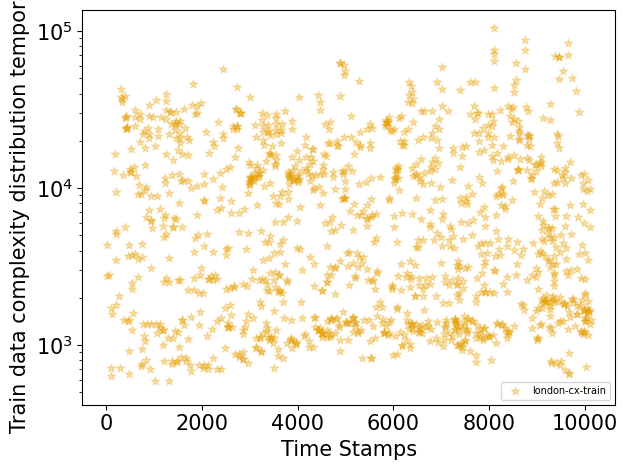

generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 3231.93it/s]


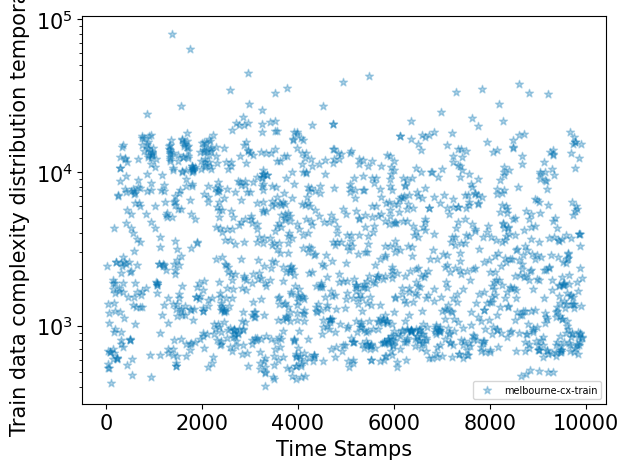

generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 3219.03it/s]


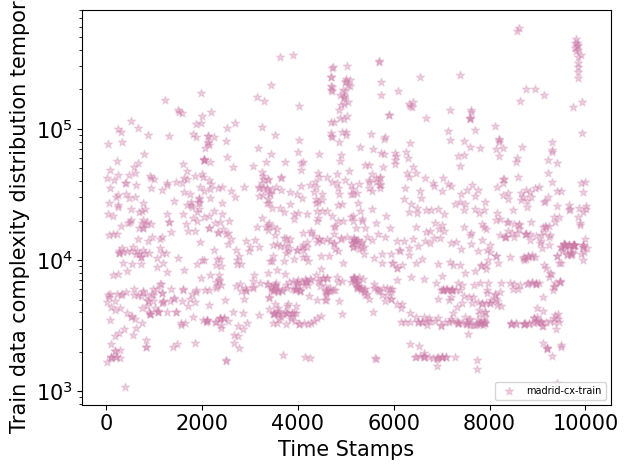

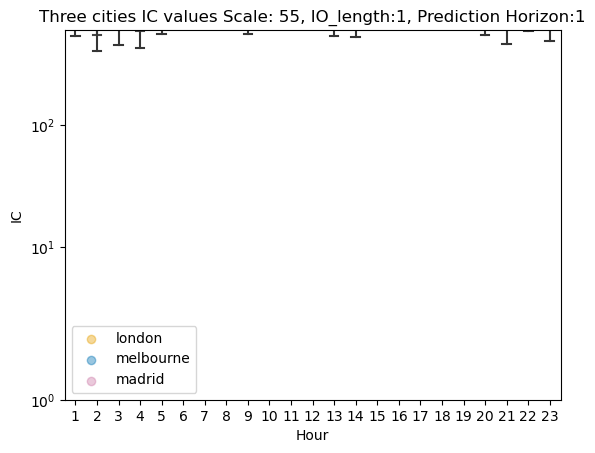

generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 3062.74it/s]


<Figure size 640x480 with 0 Axes>

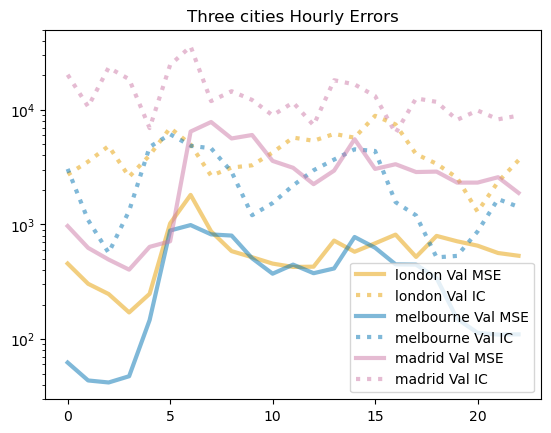

\begin{tabular}{lllrr}
\hline
 Error Type   & City      & Correlation Type   &   Correlation &   p-value \\
\hline
 val\_mse      & london    & Pearson            &         0.228 &     0.295 \\
 val\_mse      & melbourne & Pearson            &         0.681 &     0     \\
 val\_mse      & madrid    & Pearson            &         0.108 &     0.625 \\
\hline
\end{tabular}


In [132]:
os.system("rm temporal_errors_55.csv")

# file copied manually from termnial has some line continuation characters; hence grep will not work
import re

input_file = 'Spatial_results_validation_errors/temporal_errors_and_csr_scale_55/errors_temporal_55.txt'
output_file = 'temp.csv'

pattern = r'parsing_model_predict_for_temporal_errors: (\w+) (\d+) (\d+) (\d+) (\d+) ([\d.]+) ([\d.]+)'

with open(input_file, 'r') as file:
    lines = file.readlines()

filtered_lines = []
for line in lines:
    match = re.match(pattern, line)
    if match:
        city_name = match.group(1)
        numeric_items = match.groups()[1:]  # Extract numeric items from the matched groups
        filtered_lines.append(city_name + ' ' + ' '.join(numeric_items) + '\n')

with open(output_file, 'w') as file:
    file.writelines(filtered_lines)
! (echo "cityname i_o_length prediction_horizon grid_size time_stamp val_mse val_mae" && cat temp.csv) > filename1 && mv filename1 temporal_errors_55.csv

# Normal margin Cx
os.system("rm Temporal_complexity_results_train_data_thick_margin_55.csv")
! grep 'parsing_for_temporal_criticality:' Spatial_results_validation_errors/temporal_errors_and_csr_scale_55/complexity_normal_margi_55_scale_temporal_PM_run_3000_samples_val_data.txt | sed "s/parsing_for_temporal_criticality: //g" > parsed_Results.csv
! (echo "cityname i_o_length prediction_horizon grid_size time_stamp IC" && cat parsed_Results.csv) > filename1 && mv filename1 Temporal_complexity_results_val_data_thick_margin_55.csv

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
import pandas as pd
from tqdm import tqdm


import pandas as pd


# scales

violin_plot_dict_cx = {}

for city in config.city_list:

    cityname = city.lower()

    for CSR_type in [
    'IC',
        ]:

        cityname = city.lower()

        city_label_printed = []
        
        # df = pd.read_csv("Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv", sep=" ")        
        df = pd.read_csv("Temporal_complexity_results_val_data_thick_margin_55.csv", sep=" ")        

        x = []
        y = []
        for scale in [55]: #config.scales_def:
            for i_o_length in [1]:#config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname)
                                      ]
                    
                    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap

                    # if printing only some points star even if multiple present, uncomment below:
                    # range_ = list(range(2000))
                    
                    violin_plot = []
                    for i in tqdm(range_, desc="generating-plot"):
                        # if cityname in city_label_printed:
                        #     plt.scatter(filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type], marker='*',color=city_color[cityname], alpha=0.3)
                        # else:
                        #     plt.scatter(filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type], marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])
                        #     city_label_printed.append(cityname)
                        x.append(filtered_rows.iloc[i]["time_stamp"])
                        y.append(filtered_rows.iloc[i][CSR_type])
                        
                        
                        
                        # Scale preferntially for the same axis
                        
                        # if cityname == "london":
                        #     y[-1] = y[-1] * 10000
                        # elif cityname == "madrid":
                        #     y[-1] = y[-1] * 1000
                        # elif cityname == "melbourne":
                        #     y[-1] = y[-1] * 10                           

                            

                        violin_plot.append([filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type]])
                    violin_plot_dict_cx[cityname, i_o_length, pred_horiz, scale] = violin_plot
        plt.scatter(x,  y, marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])

    plt.xlabel("Time Stamps", fontsize=15)
    plt.ylabel("Train data complexity distribution temporal", fontsize=15)
    plt.yscale('log')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
    plt.tight_layout()
    plt.savefig("Temporal_dist_cx" + cityname + ".png")
    plt.show()



import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


plt.figure()
cityname_labelled = []
for key in violin_plot_dict_cx:
    cityname, i_o_length, pred_horiz, scale = key
    if scale != 55:
        continue

    df_cx = pd.DataFrame(violin_plot_dict_cx[key], columns=['ToD', 'IC'])

    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)

    df_cx["Day"] = df_cx["ToD"] // periodicity
    df_cx["Hour"] = (df_cx["ToD"] % periodicity) // 4 + 1
    
    df_cx = df_cx[df_cx["IC"] > 0]    
    # df_cx["IC"] = df_cx["IC"]/3000 # N=3000 for these runs
    
        
    # if cityname not in cityname_labelled:
    #     ax = sns.boxplot(data=df_val_error, x="Hour", y="val_mae", color=city_color[cityname], boxprops=dict(alpha=.3, label=cityname), showfliers=False)
    #     cityname_labelled.append(cityname)
    # else:
    #     print ("Not reached")
    ax = sns.boxplot(data=df_cx, x="Hour", y="IC", color=city_color[cityname], boxprops=dict(alpha=0.3), showfliers=False)
    plt.scatter(22, 0.5, color=city_color[cityname], label=cityname, alpha=0.4)
    
plt.title(r"Three cities IC values Scale: 55, IO_length:1, Prediction Horizon:1")
plt.ylim(1, 600)
plt.yscale('symlog')
plt.legend()

# plt.savefig(str(key) + "_hourly_plots_cx_thin_margin.png", dpi=300)
plt.show()


import pandas as pd

! pip install tabulate

city_color = {"london" : "#E69F00", 
             "melbourne": "#0072B2",
             "madrid": "#CC79A7"}

all_results = []
for ERROR_TYPE in ["val_mse", "val_mae"][0:1]:
    # scales

    violin_plot_dict_error = {}

    for city in config.city_list:

        cityname = city.lower()

        for CSR_type in [
        ERROR_TYPE,
            ]:

            cityname = city.lower()

            city_label_printed = []

            # df = pd.read_csv("Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv", sep=" ")        
            df = pd.read_csv("temporal_errors_55.csv", sep=" ")        

            x = []
            y = []
            for scale in [55]: #config.scales_def:
                for i_o_length in [1]:#config.i_o_lengths_def:
                    for pred_horiz in config.pred_horiz_def:
                        filtered_rows = df[    \
                                           (df["i_o_length"]==i_o_length) & \
                                           (df["grid_size"]==scale) & \
                                           (df["prediction_horizon"]==pred_horiz) &\
                                           (df["cityname"]==cityname)
                                          ]

                        periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)
                        if filtered_rows.shape[0] == 1:
                            range_ = [0]
                        else:
                            range_ = list(range(filtered_rows.shape[0]))
                            # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                            # no worries, will be plotted multiple times # this is three times because of first combination overlap

                        # if printing only some points star even if multiple present, uncomment below:
                        # range_ = list(range(2000))

                        violin_plot = []
                        for i in tqdm(range_, desc="generating-plot"):

                            x.append(filtered_rows.iloc[i]["time_stamp"])
                            y.append(filtered_rows.iloc[i][CSR_type])
                            violin_plot.append([filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type]])
                        violin_plot_dict_error[cityname, i_o_length, pred_horiz, scale] = violin_plot

            plt.scatter(x,  y, marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])

        plt.xlabel("Time Stamps", fontsize=15)
        plt.ylabel("Train data complexity distribution temporal", fontsize=15)
        plt.yscale('symlog')
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
        plt.tight_layout()
        plt.savefig("Temporal_dist_cx" + cityname + ".png")
        # plt.show()
        plt.clf()


    import seaborn as sns
    import matplotlib.pyplot as plt
    import scipy.stats


    plt.figure()
    cityname_labelled = []
    from tabulate import tabulate



    for key in violin_plot_dict_error:
        cityname, i_o_length, pred_horiz, scale = key
        for city in city_color.keys():
            if scale != 55:
                continue
            if city != cityname:
                continue

            df_val_error = pd.DataFrame(violin_plot_dict_error[key], columns=['ToD', ERROR_TYPE])

            periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)

            df_val_error["Day"] = df_val_error["ToD"] // periodicity
            df_val_error["Hour"] = (df_val_error["ToD"] % periodicity) // 4 + 1

            df_cx = pd.DataFrame(violin_plot_dict_cx[key], columns=['ToD', 'IC'])
            df_cx["Hour"] = (df_cx["ToD"] % periodicity) // 4 + 1

            # if cityname not in cityname_labelled:
            #     ax = sns.boxplot(data=df_val_error, x="Hour", y="val_mae", color=city_color[cityname], boxprops=dict(alpha=.3, label=cityname), showfliers=False)
            #     cityname_labelled.append(cityname)
            # else:
            #     print ("Not reached")
            # ax = sns.boxplot(data=df_val_error, x="Hour", y=ERROR_TYPE, color=city_color[cityname], boxprops=dict(alpha=.3), showfliers=False)


            import scipy.stats as stats

            mean_hour_values_error = df_val_error.groupby("Hour")[ERROR_TYPE].mean().tolist()
            mean_hour_values_IC = df_cx.groupby("Hour")["IC"].mean().tolist()

            # mean_hour_values_error = df_val_error.groupby("Hour")[ERROR_TYPE].mean().tolist()
            # mean_hour_values_IC = df_cx.groupby("Hour")["Cx"].mean().tolist()

            # Compute Spearman correlation and p-value
            spearman_corr, spearman_pvalue = stats.spearmanr(mean_hour_values_error, mean_hour_values_IC)

            # Compute Pearson correlation and p-value
            pearson_corr, pearson_pvalue = stats.pearsonr(mean_hour_values_error, mean_hour_values_IC)

            # Compute Kendall correlation and p-value
            kendall_corr, kendall_pvalue = stats.kendalltau(mean_hour_values_error, mean_hour_values_IC)

            # Append the correlation results for the current city and error type to the list
            # all_results.append((ERROR_TYPE, cityname, "Spearman", round(spearman_corr, 3), round(spearman_pvalue, 3)))
            all_results.append((ERROR_TYPE, cityname, "Pearson", round(pearson_corr, 3), round(pearson_pvalue, 3)))
            # all_results.append((ERROR_TYPE, cityname, "Kendall", round(kendall_corr, 3), round(kendall_pvalue, 3)))

            plt.plot(mean_hour_values_error, label=cityname + " Val MSE", color=city_color[cityname], linewidth=3, alpha=0.5)
            plt.plot(np.array(mean_hour_values_IC), ':',label=cityname + " Val IC", color=city_color[cityname], linewidth=3, alpha=0.5)

        # plt.scatter(22, 0.5, color=city_color[cityname], label=cityname, alpha=0.4)

    plt.title("Three cities Hourly Errors")
    # plt.ylim(0, 600)
    plt.yscale('log')
    plt.legend()
    plt.savefig("_hourly_plots_val_errors_55_val"+ERROR_TYPE+".png", dpi=300)
    plt.show()    

headers = ["Error Type", "City", "Correlation Type", "Correlation", "p-value"]        

# Generate the LaTeX table
table = tabulate(all_results, headers, tablefmt="latex")

# Print the LaTeX table
print(table)



generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 3107.32it/s]


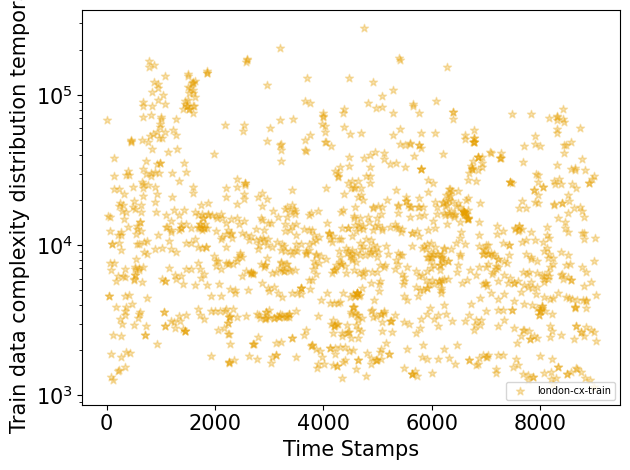

generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 3082.24it/s]


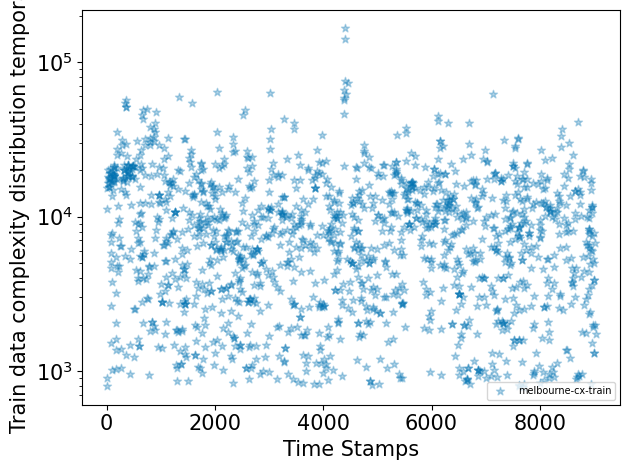

generating-plot: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 3236.36it/s]


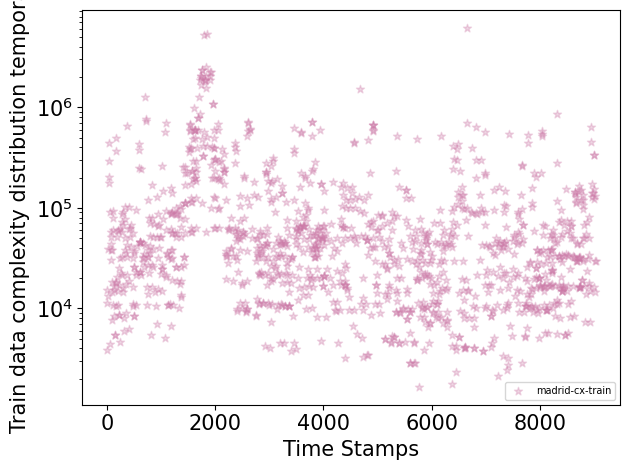

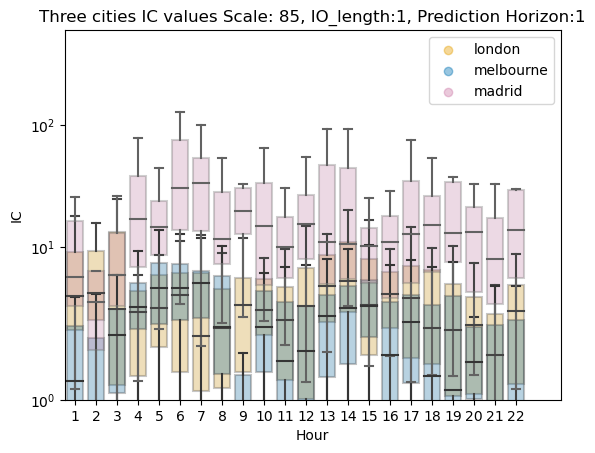

generating-plot: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 917/917 [00:00<00:00, 3300.82it/s]


<Figure size 640x480 with 0 Axes>

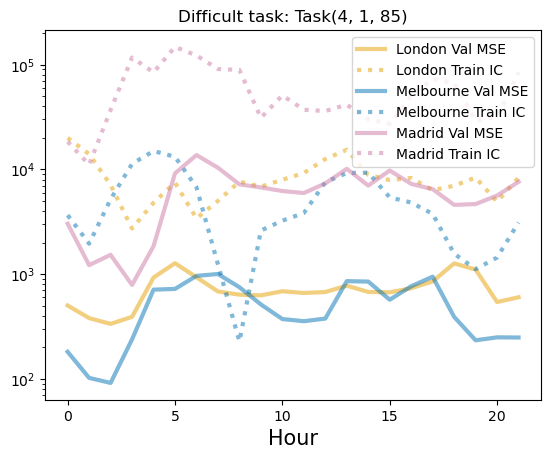

\begin{tabular}{lllrr}
\hline
 Error Type   & City      & Correlation Type   &   Correlation &   p-value \\
\hline
 val\_mse      & london    & Pearson            &        -0.202 &     0.368 \\
 val\_mse      & melbourne & Pearson            &         0.26  &     0.243 \\
 val\_mse      & madrid    & Pearson            &         0.307 &     0.164 \\
\hline
\end{tabular}


In [135]:
os.system("rm temporal_errors_85.csv")

# file copied manually from termnial has some line continuation characters; hence grep will not work
import re

input_file = 'Spatial_results_validation_errors/errors_temporal.txt'
output_file = 'temp.csv'

pattern = r'parsing_model_predict_for_temporal_errors: (\w+) (\d+) (\d+) (\d+) (\d+) ([\d.]+) ([\d.]+)'

with open(input_file, 'r') as file:
    lines = file.readlines()

filtered_lines = []
for line in lines:
    match = re.match(pattern, line)
    if match:
        city_name = match.group(1)
        numeric_items = match.groups()[1:]  # Extract numeric items from the matched groups
        filtered_lines.append(city_name + ' ' + ' '.join(numeric_items) + '\n')

with open(output_file, 'w') as file:
    file.writelines(filtered_lines)
! (echo "cityname i_o_length prediction_horizon grid_size time_stamp val_mse val_mae" && cat temp.csv) > filename1 && mv filename1 temporal_errors_85.csv

# Normal margin Cx
os.system("rm Temporal_complexity_results_train_data_thick_margin_85.csv")
! grep 'parsing_for_temporal_criticality:' Spatial_results_validation_errors/complexity_normal_margi_85_scale_temporal_PM_run_3000_samples_train_and_validation_both/complexity_normal_margi_85_scale_temporal_PM_run_3000_samples_train_data.txt | sed "s/parsing_for_temporal_criticality: //g" > parsed_Results.csv
! (echo "cityname i_o_length prediction_horizon grid_size time_stamp IC" && cat parsed_Results.csv) > filename1 && mv filename1 Temporal_complexity_results_train_data_thick_margin_85.csv

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
import pandas as pd
from tqdm import tqdm


import pandas as pd


# scales

violin_plot_dict_cx = {}

for city in config.city_list:

    cityname = city.lower()

    for CSR_type in [
    'IC',
        ]:

        cityname = city.lower()

        city_label_printed = []
        
        # df = pd.read_csv("Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv", sep=" ")        
        df = pd.read_csv("Temporal_complexity_results_train_data_thick_margin_85.csv", sep=" ")        

        x = []
        y = []
        for scale in [85]: #config.scales_def:
            for i_o_length in [4]:#config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname)
                                      ]
                    
                    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap

                    # if printing only some points star even if multiple present, uncomment below:
                    # range_ = list(range(2000))
                    
                    violin_plot = []
                    for i in tqdm(range_, desc="generating-plot"):
                        # if cityname in city_label_printed:
                        #     plt.scatter(filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type], marker='*',color=city_color[cityname], alpha=0.3)
                        # else:
                        #     plt.scatter(filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type], marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])
                        #     city_label_printed.append(cityname)
                        x.append(filtered_rows.iloc[i]["time_stamp"])
                        y.append(filtered_rows.iloc[i][CSR_type])
                        
                        
                        
                        # Scale preferntially for the same axis
                        
                        # if cityname == "london":
                        #     y[-1] = y[-1] * 10000
                        # elif cityname == "madrid":
                        #     y[-1] = y[-1] * 1000
                        # elif cityname == "melbourne":
                        #     y[-1] = y[-1] * 10                           

                            

                        violin_plot.append([filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type]])
                    violin_plot_dict_cx[cityname, i_o_length, pred_horiz, scale] = violin_plot
        plt.scatter(x,  y, marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])

    plt.xlabel("Time Stamps", fontsize=15)
    plt.ylabel("Train data complexity distribution temporal", fontsize=15)
    plt.yscale('log')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
    plt.tight_layout()
    plt.savefig("Temporal_dist_cx" + cityname + ".png")
    plt.show()



import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


plt.figure()
cityname_labelled = []
for key in violin_plot_dict_cx:
    cityname, i_o_length, pred_horiz, scale = key
    if scale != 85:
        continue

    df_cx = pd.DataFrame(violin_plot_dict_cx[key], columns=['ToD', 'IC'])

    periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)

    df_cx["Day"] = df_cx["ToD"] // periodicity
    df_cx["Hour"] = (df_cx["ToD"] % periodicity) // 4 + 1
    
    df_cx = df_cx[df_cx["IC"] > 0]    
    df_cx["IC"] = df_cx["IC"]/3000 # N=3000 for these runs
    
        
    # if cityname not in cityname_labelled:
    #     ax = sns.boxplot(data=df_val_error, x="Hour", y="val_mae", color=city_color[cityname], boxprops=dict(alpha=.3, label=cityname), showfliers=False)
    #     cityname_labelled.append(cityname)
    # else:
    #     print ("Not reached")
    ax = sns.boxplot(data=df_cx, x="Hour", y="IC", color=city_color[cityname], boxprops=dict(alpha=0.3), showfliers=False)
    plt.scatter(22, 0.5, color=city_color[cityname], label=cityname, alpha=0.4)
    
plt.title(r"Three cities IC values Scale: 85, IO_length:1, Prediction Horizon:1")
plt.ylim(1, 600)
plt.yscale('symlog')
plt.legend()

# plt.savefig(str(key) + "_hourly_plots_cx_thin_margin.png", dpi=300)
plt.show()


import pandas as pd

! pip install tabulate

city_color = {"london" : "#E69F00", 
             "melbourne": "#0072B2",
             "madrid": "#CC79A7"}

all_results = []
for ERROR_TYPE in ["val_mse", "val_mae"][0:1]:
    # scales

    violin_plot_dict_error = {}

    for city in config.city_list:

        cityname = city.lower()

        for CSR_type in [
        ERROR_TYPE,
            ]:

            cityname = city.lower()

            city_label_printed = []

            # df = pd.read_csv("Temporal_complexity_results_all_cities_io_4_standard_wide_margins.csv", sep=" ")        
            df = pd.read_csv("temporal_errors_85.csv", sep=" ")        

            x = []
            y = []
            for scale in [85]: #config.scales_def:
                for i_o_length in [4]:#config.i_o_lengths_def:
                    for pred_horiz in config.pred_horiz_def:
                        filtered_rows = df[    \
                                           (df["i_o_length"]==i_o_length) & \
                                           (df["grid_size"]==scale) & \
                                           (df["prediction_horizon"]==pred_horiz) &\
                                           (df["cityname"]==cityname)
                                          ]

                        periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)
                        if filtered_rows.shape[0] == 1:
                            range_ = [0]
                        else:
                            range_ = list(range(filtered_rows.shape[0]))
                            # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                            # no worries, will be plotted multiple times # this is three times because of first combination overlap

                        # if printing only some points star even if multiple present, uncomment below:
                        # range_ = list(range(2000))

                        violin_plot = []
                        for i in tqdm(range_, desc="generating-plot"):

                            x.append(filtered_rows.iloc[i]["time_stamp"])
                            y.append(filtered_rows.iloc[i][CSR_type])
                            violin_plot.append([filtered_rows.iloc[i]["time_stamp"],  filtered_rows.iloc[i][CSR_type]])
                        violin_plot_dict_error[cityname, i_o_length, pred_horiz, scale] = violin_plot

            plt.scatter(x,  y, marker='*',label=cityname + "-cx-train", alpha=0.3, color=city_color[cityname])

        plt.xlabel("Time Stamps", fontsize=15)
        plt.ylabel("Train data complexity distribution temporal", fontsize=15)
        plt.yscale('symlog')
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
        plt.tight_layout()
        plt.savefig("Temporal_dist_cx" + cityname + "85.png")
        # plt.show()
        plt.clf()


    import seaborn as sns
    import matplotlib.pyplot as plt
    import scipy.stats


    plt.figure()
    cityname_labelled = []
    from tabulate import tabulate



    for key in violin_plot_dict_error:
        cityname, i_o_length, pred_horiz, scale = key
        for city in city_color.keys():
            if scale != 85:
                continue
            if city != cityname:
                continue

            df_val_error = pd.DataFrame(violin_plot_dict_error[key], columns=['ToD', ERROR_TYPE])

            periodicity = 96 - (pred_horiz + i_o_length * 2 + 1)

            df_val_error["Day"] = df_val_error["ToD"] // periodicity
            df_val_error["Hour"] = (df_val_error["ToD"] % periodicity) // 4 + 1

            df_cx = pd.DataFrame(violin_plot_dict_cx[key], columns=['ToD', 'IC'])
            df_cx["Hour"] = (df_cx["ToD"] % periodicity) // 4 + 1

            # if cityname not in cityname_labelled:
            #     ax = sns.boxplot(data=df_val_error, x="Hour", y="val_mae", color=city_color[cityname], boxprops=dict(alpha=.3, label=cityname), showfliers=False)
            #     cityname_labelled.append(cityname)
            # else:
            #     print ("Not reached")
            # ax = sns.boxplot(data=df_val_error, x="Hour", y=ERROR_TYPE, color=city_color[cityname], boxprops=dict(alpha=.3), showfliers=False)


            import scipy.stats as stats

            mean_hour_values_error = df_val_error.groupby("Hour")[ERROR_TYPE].mean().tolist()
            mean_hour_values_IC = df_cx.groupby("Hour")["IC"].mean().tolist()

            # mean_hour_values_error = df_val_error.groupby("Hour")[ERROR_TYPE].mean().tolist()
            # mean_hour_values_IC = df_cx.groupby("Hour")["Cx"].mean().tolist()

            # Compute Spearman correlation and p-value
            spearman_corr, spearman_pvalue = stats.spearmanr(mean_hour_values_error, mean_hour_values_IC)

            # Compute Pearson correlation and p-value
            pearson_corr, pearson_pvalue = stats.pearsonr(mean_hour_values_error, mean_hour_values_IC)

            # Compute Kendall correlation and p-value
            kendall_corr, kendall_pvalue = stats.kendalltau(mean_hour_values_error, mean_hour_values_IC)

            # Append the correlation results for the current city and error type to the list
            # all_results.append((ERROR_TYPE, cityname, "Spearman", round(spearman_corr, 3), round(spearman_pvalue, 3)))
            all_results.append((ERROR_TYPE, cityname, "Pearson", round(pearson_corr, 3), round(pearson_pvalue, 3)))
            # all_results.append((ERROR_TYPE, cityname, "Kendall", round(kendall_corr, 3), round(kendall_pvalue, 3)))

            plt.plot(mean_hour_values_error, label=cityname.title() + " Val MSE", color=city_color[cityname], linewidth=3, alpha=0.5)
            plt.plot(np.array(mean_hour_values_IC), ':',label=cityname.title() + " Train IC", color=city_color[cityname], linewidth=3, alpha=0.5)

        # plt.scatter(22, 0.5, color=city_color[cityname], label=cityname, alpha=0.4)

    plt.title("Difficult task: Task(4, 1, 85)")
    # plt.ylim(0, 600)
    plt.yscale('log')
    plt.xlabel("Hour", fontsize=15)
    plt.legend()
    plt.savefig("_hourly_plots_val_errors_"+ERROR_TYPE+"85.png", dpi=300)
    plt.show()    

headers = ["Error Type", "City", "Correlation Type", "Correlation", "p-value"]        

# Generate the LaTeX table
table = tabulate(all_results, headers, tablefmt="latex")

# Print the LaTeX table
print(table)



In [119]:
violin_plot_dict_error.keys()

dict_keys([('london', 4, 1, 55), ('melbourne', 4, 1, 55), ('madrid', 4, 1, 55)])

In [23]:
mean_hour_values_error = df_val_error.groupby("Hour")[ERROR_TYPE].mean().tolist()

In [24]:
mean_hour_values_error

[27.51565615005787,
 23.10180768534568,
 23.82338664167761,
 20.795508477647427,
 26.355762496429985,
 46.05773071763349,
 84.5372515294543,
 61.03660809730073,
 66.87152326774732,
 60.29606617481338,
 55.460858442329595,
 57.18109109527886,
 55.18524304753352,
 63.586433243707816,
 70.4765707680249,
 62.77417726072067,
 58.28411516120069,
 63.6166067702171,
 62.13851218009933,
 59.81228119453461,
 57.15777487141879,
 48.226197919493686]